# Census Exploratory Data Analysis

### Importing relevant Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the csv file with Pandas

In [2]:
df = pd.read_csv("census14.csv")

## Data Exploration

In [3]:
# Displaying the first 5 records in the dataset
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Analytical chemist,None,Catholic
1,2,Davies Trafficway,Ashleigh,Smith,42,Head,Single,Female,Unemployed,None,None
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,"Retired Designer, graphic",None,Catholic
3,4,Davies Trafficway,Carly,Johnson,26,Head,Single,Female,Unemployed,None,None
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,General practice doctor,None,Muslim


In [4]:
# Checking the duplicates
df.duplicated().sum()

0

- The dataset does not contain any duplicate records.

In [5]:
# Displaying the column headers
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [6]:
# Renaming the column headers
df.columns = df.columns.str.replace(" ", "_")

In [7]:
df.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Analytical chemist,None,Catholic
1,2,Davies Trafficway,Ashleigh,Smith,42,Head,Single,Female,Unemployed,None,None
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,"Retired Designer, graphic",None,Catholic
3,4,Davies Trafficway,Carly,Johnson,26,Head,Single,Female,Unemployed,None,None
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,General practice doctor,None,Muslim


- Based on the above results, it is evident that the column headers have been updated.

In [8]:
# Checking some records in the dataset at random
df.sample(5)

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6002,2,Black Street,Deborah,Davis,37,Head,Single,Female,Unemployed,None,Christian
5084,38,Brick Branch,Craig,Brown,88,Husband,Married,Male,"Retired Scientist, physiological",None,Christian
1723,34,Black Cape,Lucy,Harrison,35,Head,Single,Female,Unemployed,None,Catholic
3640,145,ExcaliburBells Estate,Carol,Gregory,35,Head,Married,Female,Data processing manager,None,Catholic
4511,40,Canary Road,Shane,Hall,2,Son,NaN,Male,Child,None,NaN


In [9]:
# Checking the data dimension
df.shape

(8296, 11)

- The dataset contains 8296 rows and 11 columns.

In [10]:
# Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   8296 non-null   int64 
 1   Street                         8296 non-null   object
 2   First_Name                     8296 non-null   object
 3   Surname                        8296 non-null   object
 4   Age                            8296 non-null   object
 5   Relationship_to_Head_of_House  8296 non-null   object
 6   Marital_Status                 6427 non-null   object
 7   Gender                         8296 non-null   object
 8   Occupation                     8296 non-null   object
 9   Infirmity                      8296 non-null   object
 10  Religion                       6383 non-null   object
dtypes: int64(1), object(10)
memory usage: 713.1+ KB


- Out of the 11 columns, 10 are of the object data type and 1 is of the integer data type. The Marital Status and Religion features have missing values that will be addressed as we move forward. Additionally, the Age feature was initially represented as a string and will be converted to an integer since age is typically expressed in whole numbers.

In [11]:
# Investigating the missing values
df.isnull().sum()

House_Number                        0
Street                              0
First_Name                          0
Surname                             0
Age                                 0
Relationship_to_Head_of_House       0
Marital_Status                   1869
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1913
dtype: int64

- The Marital Status feature contains 1869 missing values, while the Religion feature has 1913 missing values.

## Data Preprocessing

### Processing Age Column

In [12]:
# Checking the unique values of the Age Feature

df["Age"].unique()

array(['42', '74', '26', '32', '22', '19', '95', '31', '33', '10', '66',
       '69', '48', '54', '16', '13', '47', '52', '11', '9', '73', '8',
       '39', '18', '56', '60', '27', '24', '55', '50', '35', '36', '23',
       '20', '43', '45', '30', '59', '67', '65', '17', '49', '12', '21',
       '14', '79', '77', '41', '38', '2', '70', '34', '40', '71', '37',
       '53', '15', '85', '57', '1', '44', '6', '5', '3', '4', '29', '7',
       '28', '51', '64', '61', '63', '46', '58', '94', '25', '0', '68',
       '76', '80', '86', '82', '83', '88', '75', '96', '98', '62', '78',
       '93', '92', '72', '84', '81', '87', ' ', '89', '71.84377772328801',
       '74.84377772328801', '24.0', '90', '99', '101', '104',
       '81.37013467117734', '8.0', '5.0', '103', '102', '91', '100',
       '105', '97', '56.62833185824795', '53.62833185824795', '1.0'],
      dtype=object)

- The Age feature consists of empty strings, strings, and floating point numbers, which will be converted to integers.

In [13]:
# Checking the value counts
df["Age"].value_counts()

37                   152
41                   148
32                   147
42                   146
36                   144
                    ... 
81.37013467117734      1
104                    1
                       1
71.84377772328801      1
1.0                    1
Name: Age, Length: 116, dtype: int64

- Based on the above results, it is evident that the dominant age in the population is 37.

In [14]:
# Checking if there is a missing value in the Age Feature
df[df["Age"].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- There is no missing value in the Age Feature

In [15]:
# Checking if there is an empty string in the Age Feature
df[df["Age"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1757,46,Black Cape,Richard,Cook,,Cousin,Single,Male,Architect,None,None


- The Age Feature contains an empty string. To determine a suitable value to fill this missing data point, we will examine other members in the household and explore whether their ages can guide us in imputing a value for the empty string in Age.

In [16]:
# Investigating the record with the empty string by examining other individuals within the same household
df[(df["House_Number"] == 46) & (df["Street"] == "Black Cape")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1755,46,Black Cape,Catherine,Patel,32,Head,Single,Female,"Accountant, chartered public finance",None,Catholic
1756,46,Black Cape,Leigh,Riley,23,Lodger,Single,Male,"Conservator, museum/gallery",None,Christian
1757,46,Black Cape,Richard,Cook,,Cousin,Single,Male,Architect,None,None
1758,46,Black Cape,Cheryl,Wood,44,Lodger,Divorced,Female,"Librarian, public",None,Catholic
1759,46,Black Cape,Gavin,Reynolds,22,Lodger,Single,Male,University Student,None,Catholic


- Based on the records provided, it is not possible to determine the age of Richard, who is a cousin of Catherine (the head of household) and whose age is known to be 32. This is because the age of Richard cannot be imputed based solely on the information available for other members of his household. Therefore, alternative statistical methods will be explored to replace the missing value in the Age Feature.

In [17]:
# Replacing the empty string with NaN as a placeholder to allow for data type conversion
df["Age"] = df["Age"].replace(" ", np.nan)

In [18]:
# Checking if the empty string has been replaced
df[df["Age"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The empty string has now been successfully replaced with NaN (Not a Number).

In [19]:
# Converting the column to float data type
df["Age"] = df["Age"].astype(float)

In [20]:
# Checking the Age data type
df["Age"].dtype

dtype('float64')

- The data type of the Age feature has been successfully converted from string to float.

In [21]:
# Confirming if the Null value placeholder has been assigned to the empty string
df["Age"].isnull().sum()

1

- It is evident that the empty string has been assigned as the null value placeholder. The following cell will investigate whether the median or mean age of the cousins and heads of households in the population can be utilized to fill in the missing values.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House_Number                   8296 non-null   int64  
 1   Street                         8296 non-null   object 
 2   First_Name                     8296 non-null   object 
 3   Surname                        8296 non-null   object 
 4   Age                            8295 non-null   float64
 5   Relationship_to_Head_of_House  8296 non-null   object 
 6   Marital_Status                 6427 non-null   object 
 7   Gender                         8296 non-null   object 
 8   Occupation                     8296 non-null   object 
 9   Infirmity                      8296 non-null   object 
 10  Religion                       6383 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 713.1+ KB


In [23]:
# Examining the median and mean ages of the Cousins and Heads within the population
df.groupby("Relationship_to_Head_of_House")["Age"].describe().T

Relationship_to_Head_of_House,,Adopted Daughter,Adopted Grandson,Adopted Son,Cousin,Daughter,Daughter-in-law,Granddaughter,Grandson,Head,...,Nephew,None,Partner,Sibling,Son,Son-in-law,Step-Daughter,Step-Son,Visitor,Wife
count,1.0,16.000000,1.0,10.000000,29.000000,1231.000000,2.000000,74.000000,90.000000,3252.000000,...,16.000000,496.000000,242.000000,25.000000,1264.000000,1.0,10.000000,9.000000,24.000000,324.000000
mean,25.0,17.312500,15.0,14.900000,40.758621,15.947197,53.000000,12.567568,13.577778,49.249029,...,10.000000,37.893145,42.219008,40.280000,15.010285,59.0,8.800000,12.777778,40.708333,50.393915
std,NaN,11.145814,NaN,9.255029,12.497586,11.207415,7.071068,6.858813,6.815346,17.724933,...,6.928203,13.860877,11.604011,14.249327,11.047686,NaN,5.452828,10.790943,14.683558,19.753190
min,25.0,0.000000,15.0,0.000000,19.000000,0.000000,48.000000,0.000000,0.000000,15.000000,...,0.000000,8.000000,19.000000,20.000000,0.000000,59.0,2.000000,2.000000,18.000000,19.000000
25%,25.0,10.500000,15.0,7.000000,31.000000,8.000000,50.500000,8.000000,8.000000,36.000000,...,5.750000,26.000000,33.250000,24.000000,7.000000,59.0,3.250000,5.000000,31.250000,35.000000
50%,25.0,14.500000,15.0,16.500000,42.000000,14.000000,53.000000,12.000000,14.000000,47.000000,...,9.000000,37.000000,41.500000,39.000000,13.000000,59.0,11.000000,9.000000,35.500000,48.000000
75%,25.0,26.000000,15.0,22.750000,51.000000,22.000000,55.500000,16.000000,18.000000,62.000000,...,16.250000,49.000000,51.000000,55.000000,21.000000,59.0,12.750000,14.000000,54.250000,66.000000
max,25.0,38.000000,15.0,24.000000,61.000000,66.000000,58.000000,29.000000,28.000000,103.000000,...,23.000000,64.000000,70.000000,63.000000,63.000000,59.0,16.000000,31.000000,64.000000,102.000000


- According to the results obtained, the average age of heads of households in the population is 49, while the average age of their cousins is 41. The median ages of the heads and cousins are 47 and 42, respectively. As the median is not influenced by outliers, the difference in the median ages (which is 5) will be used to fill in missing age information. Therefore, we can infer that there is a 5-year age difference between Catherine (the head) and Richard (the cousin), and we can estimate that Richard is 27 years old, given that Catherine is 32.

In [24]:
# Filling the NaN value with 27
df["Age"].fillna(27, inplace = True)

In [25]:
# Checking if the null value placeholder has been replaced

df["Age"].isnull().sum()

0

- It is clear that the placeholder has been successfully replaced. In the next step, we will convert the Age feature from float to integer since ages are typically represented as whole numbers.

In [26]:
# Converting Age from float to integer
df["Age"] = df["Age"].astype(int)

In [27]:
# Checking the data type of Age
df["Age"].dtype

dtype('int32')

- The Age feature has been successfully converted to integer

In [28]:
sorted(df["Age"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105]

- The list of distinct values within the Age Feature indicates that it has undergone thorough cleaning and formatting.

### Processing Marital Status

In [29]:
# Checking the unique values
df["Marital_Status"].unique()

array(['Divorced', 'Single', 'Widowed', 'Married', nan], dtype=object)

In [30]:
# Checking the value counts
df["Marital_Status"].value_counts()

Single      2770
Married     2536
Divorced     747
Widowed      374
Name: Marital_Status, dtype: int64

- Singles are more represented in the population while widows are the least represented group.  

In [31]:
# checking if there is any empty string in the Marital Status feature
df[df["Marital_Status"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The Marital Status Feature does not contain any empty strings.

In [32]:
# Checking the missing values again
df["Marital_Status"].isnull().sum()

1869

- There are a total of 1869 missing values in the Marital Status feature, which will be addressed in the upcoming cells.

In [33]:
# Examining the rows with the missing values
df[df["Marital_Status"].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,NaN,Male,Student,None,NaN
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,NaN,Female,Student,None,NaN
16,4,Bibi Manors,Raymond,Moore,16,Son,NaN,Male,Student,None,NaN
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,NaN,Male,Student,None,NaN
20,5,Bibi Manors,Philip,Smith,11,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,NaN,Female,Child,None,NaN
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,NaN,Female,Child,None,NaN
8293,1,Aries Cottage,Terence,Morris,13,Son,NaN,Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,NaN,Male,Student,None,NaN


- Based on the displayed rows above, it appears that a large proportion of the missing values belong to individuals under 18 years of age. Additional investigation will be conducted in the subsequent cells.

In [34]:
# Investigating if the bulk of the missing values belong to persons below Age 18
df[(df["Age"] <= 17) & (df["Marital_Status"].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,NaN,Male,Student,None,NaN
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,NaN,Female,Student,None,NaN
16,4,Bibi Manors,Raymond,Moore,16,Son,NaN,Male,Student,None,NaN
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,NaN,Male,Student,None,NaN
20,5,Bibi Manors,Philip,Smith,11,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,NaN,Female,Child,None,NaN
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,NaN,Female,Child,None,NaN
8293,1,Aries Cottage,Terence,Morris,13,Son,NaN,Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,NaN,Male,Student,None,NaN


- Based on the displayed rows above, it is evident that the missing values pertain solely to individuals under 18 years of age. Therefore, these missing values will be imputed with the label "Single (Child)," as individuals under 18 years are categorized as children in the United Kingdom, as per the reference provided: https://www.gov.uk/guidance/case-management-guidance/definitions#:~:text=We%20define%20a%20child%20as,legislation%20in%20England%20and%20Wales.

In [35]:
# Imputing "Single (Child)" for all the missing values
df.loc[(df["Age"] <= 17) & (df["Marital_Status"].isnull()), :] = df.loc[(df["Age"] <= 17) & (df["Marital_Status"].isnull()), :].fillna(value = {"Marital_Status": "Single (Child)"})

In [36]:
# Checking the rows with the missing values again

df["Marital_Status"].isnull().sum()

0

- It's evident that the missing values have been successfully replaced.

In [37]:
# Checking the new value counts of Marital Status
df["Marital_Status"].value_counts()

Single            2770
Married           2536
Single (Child)    1869
Divorced           747
Widowed            374
Name: Marital_Status, dtype: int64

- The missing values have been replaced with "Single (Child)" since they are minors.

In [38]:
# Checking the percentage of the value counts of Marital Status
df["Marital_Status"].value_counts(normalize = True) * 100

Single            33.389585
Married           30.568949
Single (Child)    22.528930
Divorced           9.004339
Widowed            4.508197
Name: Marital_Status, dtype: float64

- Based on the aforementioned results, it can be concluded that 33.4% of the population is comprised of individuals who are unmarried, 30.6% are married, 22.5% are unmarried and under the age of 18, 9% are divorced, and 4.5% are widowed.

In [39]:
# Checking if there are individuals under 18 that are single
df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Single"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3801,195,ExcaliburBells Estate,Lindsey,Townsend,15,Head,Single,Female,Student,None,NaN


- The above result shows clearly that there is an individual that is "Single" under the age of 18 in the population. This will be replaced with "Single (Child)" in the cell below since the UK law stated above classified persons under 18 as Children.

In [40]:
# Replacing the Marital Status of the individual under 18 that identified as "Single" with "Single (Child)"
df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Single"), :] = df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Single"), :].replace("Single", "Single (Child)")

In [41]:
# Confirmation check 
df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Single"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The marital status of that individual under 18 that identified as "Single" has now been replaced with "Single (Child)".

In [42]:
# Checking if there are people under 18 that are married
df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Married"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The above result shows clearly that there is none that is married under the age of 18 in the population.

In [43]:
# Checking if there are people under 18 that are widowed
df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Widowed"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The above result shows clearly that there is none that is widowed under the age of 18 in the population.

In [44]:
# Checking if there are individuals of age 18 years or less that are widowed
df.loc[(df["Age"] <= 18) & (df["Marital_Status"] == "Widowed"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4393,25,Duffy Avenue,Graham,Gregory,18,Son,Widowed,Male,Student,None,Catholic
6207,5,Bradley Vista,Charlie,Riley,18,Grandson,Widowed,Male,Student,None,None


- Based on the records displayed in the cell above, it appears that two individuals who are 18 years of age and identified as students (not university students) are also widowed. Moreover, one of them is recognized as a grandson to the head of the household. This questions the accuracy of their recorded marital status. Consequently, it is recommended that their marital status be updated to "Single" given that they are no longer minors.

In [45]:
# Updating the marital status of the "Widowed" at age 18 or less to "Single"
df.loc[(df["Age"] <= 18) & (df["Marital_Status"] == "Widowed"), :] = df.loc[(df["Age"] <= 18) & (df["Marital_Status"] == "Widowed"), :].replace("Widowed", "Single")

In [46]:
# Confirmation check 
df.loc[(df["Age"] <= 18) & (df["Marital_Status"] == "Widowed"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The result above shows that there are no more individuals who are 18 years of age that are widowed.

In [47]:
# Checking if there are individuals under 18 that are divorced
df.loc[(df["Age"] <= 17) & (df["Marital_Status"] == "Divorced"), :]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The above result shows clearly that there is none that is divorced under the age of 18 in the population.

In [48]:
# Investigating where the widowed are granddaugters
df[(df["Marital_Status"] == "Widowed") & (df["Relationship_to_Head_of_House"] == "Granddaughter")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5888,3,Griffiths Dale,Jenna,Rhodes,29,Granddaughter,Widowed,Female,"Engineer, drilling",None,None


In [49]:
# Checking the members of the household of the widowed granddaughter
df[(df["House_Number"] == 3) & (df["Street"] == "Griffiths Dale")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5887,3,Griffiths Dale,Reece,Patel,61,Head,Single,Male,Health visitor,None,None
5888,3,Griffiths Dale,Jenna,Rhodes,29,Granddaughter,Widowed,Female,"Engineer, drilling",None,None
5889,3,Griffiths Dale,Colin,Rhodes,27,Grandson,Divorced,Male,Commissioning editor,None,None


- Based on the above findings, the widowed granddaughter is 29 years old, while the head of the household is 61 years old. This age difference appears implausible upon consideration. If we assume that the parent of the granddaughter was born when the grandfather was 18 years old, it would imply that the granddaughter was born when her parent was 14 years old, which is below the legal age of marriage (18 years) in the UK. However, it is possible that the parent had given birth at an early age, prior to reaching the legal age of marriage in the UK. Moreover, it is noteworthy that in 1881, the year in which the census was conducted, it was permissible for males as young as 13 and females as young as 12 to marry. 

In [50]:
# Investigating where the divorced are grandsons
df[(df["Marital_Status"] == "Divorced") & (df["Relationship_to_Head_of_House"] == "Grandson")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3286,33,ExcaliburBells Estate,Kyle,Jackson,19,Grandson,Divorced,Male,University Student,None,None
4790,148,Canary Road,Karl,Dean,19,Grandson,Divorced,Male,University Student,None,Catholic
5889,3,Griffiths Dale,Colin,Rhodes,27,Grandson,Divorced,Male,Commissioning editor,None,None
6436,13,Lime Crescent,Eric,Winter,21,Grandson,Divorced,Male,University Student,None,None
7809,175,Grace Lane,Bernard,Edwards,28,Grandson,Divorced,Male,Retail banker,None,None


- There are a total of five individuals identified as divorced grandsons in the population. Additional inquiry will be conducted to confirm the accuracy and validity of these records.

In [51]:
# Checking the members of the household of the divorced grandson in house number "33", "ExcaliburBells Estate" Street
df[(df["House_Number"] == 33) & (df["Street"] == "ExcaliburBells Estate")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3284,33,ExcaliburBells Estate,Jayne,Nicholls,63,Head,Divorced,Female,"Engineer, site",None,Catholic
3285,33,ExcaliburBells Estate,Kelly,Williams,21,Granddaughter,Single,Female,University Student,None,Catholic
3286,33,ExcaliburBells Estate,Kyle,Jackson,19,Grandson,Divorced,Male,University Student,None,None


In [52]:
# Checking the members of the household of the divorced grandson in house number "148", "Canary Road" Street
df[(df["House_Number"] == 148) & (df["Street"] == "Canary Road")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4788,148,Canary Road,Denise,Marshall,65,Head,Divorced,Female,Unemployed,None,Catholic
4789,148,Canary Road,Tracey,Pratt,22,Granddaughter,Single,Female,University Student,None,Catholic
4790,148,Canary Road,Karl,Dean,19,Grandson,Divorced,Male,University Student,None,Catholic
4791,148,Canary Road,Sandra,Dean,15,Granddaughter,Single (Child),Female,Student,None,NaN
4792,148,Canary Road,Maria,Dean,13,Granddaughter,Single (Child),Female,Student,None,NaN


- Based on the above findings, the divorced grandson is 19 years old, while the head of the household is 65 years old. The age difference appears realistic.

In [53]:
# Checking the members of the household of the divorced grandson in house number "3", "Griffiths Dale" Street
df[(df["House_Number"] == 3) & (df["Street"] == "Griffiths Dale")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5887,3,Griffiths Dale,Reece,Patel,61,Head,Single,Male,Health visitor,None,None
5888,3,Griffiths Dale,Jenna,Rhodes,29,Granddaughter,Widowed,Female,"Engineer, drilling",None,None
5889,3,Griffiths Dale,Colin,Rhodes,27,Grandson,Divorced,Male,Commissioning editor,None,None


Based on the above findings, the divorced grandson is 27 years old, while the head of the household is 61 years old. This age difference appears implausible upon consideration. If we assume that the parent of the granddaughter was born when the grandfather was 18 years old, it would imply that the granddaughter was born when her parent was 16 years old, which is below the legal age of marriage (18 years) in the UK. However, it is possible that the parent had given birth at an early age, prior to reaching the legal age of marriage in the UK. Moreover, it is noteworthy that in 1881, the year in which the census was conducted, it was permissible for males as young as 13 and females as young as 12 to marry.

In [54]:
# Checking the members of the household of the divorced grandson in house number "13", "Lime Crescent" street 
df[(df["House_Number"] == 13) & (df["Street"] == "Lime Crescent")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6434,13,Lime Crescent,Tracey,Winter,76,Head,Married,Female,Retired Multimedia specialist,None,Christian
6435,13,Lime Crescent,Shaun,Winter,78,Husband,Married,Male,Retired Stage manager,None,Christian
6436,13,Lime Crescent,Eric,Winter,21,Grandson,Divorced,Male,University Student,None,None
6437,13,Lime Crescent,Simon,Winter,19,Grandson,Single,Male,University Student,None,None


Based on the above findings, the divorced grandson is 21 years old, while the head of the household is 76 years old. The age difference appears very realistic.

In [55]:
# Investigating where the divorced are granddaughters
df[(df["Marital_Status"] == "Divorced") & (df["Relationship_to_Head_of_House"] == "Granddaughter")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5236,13,Quayside Drive,Anna,Riley,22,Granddaughter,Divorced,Female,University Student,None,Catholic
5341,7,Richardson Shoal,Joanne,Webster,26,Granddaughter,Divorced,Female,Unemployed,None,None
6254,16,Bradley Vista,Chelsea,Smith,19,Granddaughter,Divorced,Female,University Student,None,Catholic


- There are a total of three individuals identified as divorced granddaughters in the population. Additional inquiry will be conducted to confirm the accuracy and validity of these records.

In [56]:
# Checking the members of the household of the divorced granddaughter in house number "13", "Quayside Drive" street 
df[(df["House_Number"] == 13) & (df["Street"] == "Quayside Drive")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5235,13,Quayside Drive,Elliott,Riley,62,Head,Single,Male,"Designer, graphic",None,Catholic
5236,13,Quayside Drive,Anna,Riley,22,Granddaughter,Divorced,Female,University Student,None,Catholic
5237,13,Quayside Drive,Jacob,Riley,21,Grandson,Single,Male,University Student,None,Catholic


Based on the above findings, the divorced granddaughter is 22 years old, while the head of the household is 62 years old. The age difference appears realistic.

In [57]:
# Checking the members of the household of the divorced granddaughter in house number "7", "Richardson Shoal" street 
df[(df["House_Number"] == 7) & (df["Street"] == "Richardson Shoal")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5338,7,Richardson Shoal,Shirley,Read,83,Head,Divorced,Female,Retired Health promotion specialist,None,None
5339,7,Richardson Shoal,Timothy,Ward,28,Grandson,Single,Male,Trade union research officer,None,None
5340,7,Richardson Shoal,Alison,Johnson,28,Granddaughter,Single,Female,Unemployed,None,None
5341,7,Richardson Shoal,Joanne,Webster,26,Granddaughter,Divorced,Female,Unemployed,None,None
5342,7,Richardson Shoal,Vanessa,Webster,25,Granddaughter,Single,Female,Financial risk analyst,None,None


Based on the above findings, the divorced granddaughter is 26 years old, while the head of the household is 83 years old. The age difference appears very realistic.

In [58]:
# Checking the members of the household of the divorced granddaughter in house number "16", "Bradley Vista" street 
df[(df["House_Number"] == 16) & (df["Street"] == "Bradley Vista")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6252,16,Bradley Vista,Julie,Booth,73,Head,Married,Female,Retired Risk analyst,None,Catholic
6253,16,Bradley Vista,Simon,Booth,75,Husband,Married,Male,"Retired Designer, multimedia",None,None
6254,16,Bradley Vista,Chelsea,Smith,19,Granddaughter,Divorced,Female,University Student,None,Catholic
6255,16,Bradley Vista,Jeffrey,Smith,18,Grandson,Single,Male,Student,None,None


Based on the above findings, the divorced granddaughter is 19 years old, while the head of the household is 73 years old. The age difference appears very realistic.

In [59]:
# Investigating where the Married individuals are Students
df[(df["Marital_Status"] == "Married") & (df["Occupation"] == "Student")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
347,4,Lichfield Hill,Jay,Potter,18,Head,Married,Male,Student,None,NaN
1206,24,Gray Mount,Martyn,Jones,18,Head,Married,Male,Student,None,NaN
1767,49,Black Cape,Guy,Wood,18,Head,Married,Male,Student,None,NaN
2594,8,Wolverhampton Shore,Abdul,Abbott,18,Head,Married,Male,Student,None,NaN
2768,69,Cardiffrush Lane,Keith,Russell,18,Head,Married,Male,Student,None,NaN
4051,38,Holyrood Meadows,Christine,Powell,18,Head,Married,Female,Student,Deaf,NaN
7745,146,Grace Lane,Alexandra,Osborne,18,Head,Married,Female,Student,None,NaN


- Based on the above findings, seven married individuals are students and are 18 years old which is the legal age of marriage in the UK. We can assume that the records are valid since it's actually possible to be married and still be attending High School.

## Processing Gender

In [60]:
# Checking the uniques
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

- There are only Male and Female unique values in the Gender feature.

In [61]:
# Checking the value counts
df["Gender"].value_counts()

Female    4346
Male      3950
Name: Gender, dtype: int64

- The result above suggests that there are more Females in the population than the Males

In [62]:
# Checking the percentage of value counts
df["Gender"].value_counts(normalize = True) * 100

Female    52.386692
Male      47.613308
Name: Gender, dtype: float64

- The above result shows that females are about 52% of the population while the males are about 48% of the population.

In [63]:
# Checking if there is any missing value
df["Gender"].isnull().sum()

0

- There is no missing value in the Gender feature.

In [64]:
# Investigating if there is any empty string in the Gender feature
df[df["Gender"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- There is no empty string in the Gender feature.

## Processing Relationship_to_Head_of_House

In [65]:
df["Relationship_to_Head_of_House"].unique()

array(['Head', 'Wife', 'Partner', 'Son', 'Husband', 'Daughter',
       'Grandson', 'None', 'Lodger', 'Visitor', 'Sibling', 'Cousin',
       'Granddaughter', 'Daughter-in-law', 'Step-Daughter', 'Step-Son',
       'Neice', 'Adopted Daughter', 'Nephew', 'Adopted Son',
       'Adopted Grandson', ' ', 'Son-in-law'], dtype=object)

- One of the unique values of "Relationship_to_Head_of_House" is "Neice", which is a misspelling of "Niece". This error will be corrected in the following cells. Additionally, an empty string is present as one of the unique values in "Relationship_to_Head_of_House", which will also be replaced.

In [66]:
# Replacing "Neice" with "Niece"
df["Relationship_to_Head_of_House"].replace("Neice", "Niece", inplace = True)

In [67]:
df["Relationship_to_Head_of_House"].unique()

array(['Head', 'Wife', 'Partner', 'Son', 'Husband', 'Daughter',
       'Grandson', 'None', 'Lodger', 'Visitor', 'Sibling', 'Cousin',
       'Granddaughter', 'Daughter-in-law', 'Step-Daughter', 'Step-Son',
       'Niece', 'Adopted Daughter', 'Nephew', 'Adopted Son',
       'Adopted Grandson', ' ', 'Son-in-law'], dtype=object)

Comment: "Neice" has been successfully replaced with "Niece"

In [68]:
# Checking if there is any empty string in Relationship_to_Head_of_House feature
df[df["Relationship_to_Head_of_House"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6744,21,Glorygain Crescent,Dale,Davies,25,,Single,Male,"Editor, magazine features",None,None


- The analysis shows that the "Relationship_to_Head_of_House" feature contains an empty string. To address this, we will investigate further by examining the details of the household members to determine if the empty string can be imputed.

In [69]:
# Examining the members of the household of Dale Davies
df[(df["House_Number"] == 21) & (df["Street"] == "Glorygain Crescent")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6740,21,Glorygain Crescent,Hayley,Davies,64,Head,Single,Female,Unemployed,None,Methodist
6741,21,Glorygain Crescent,Adam,Davies,30,Son,Divorced,Male,Museum/gallery conservator,None,None
6742,21,Glorygain Crescent,Alice,Davies,29,Daughter,Single,Female,Chartered legal executive (England and Wales),None,None
6743,21,Glorygain Crescent,Marie,Davies,29,Daughter,Single,Female,Barrister,None,Methodist
6744,21,Glorygain Crescent,Dale,Davies,25,,Single,Male,"Editor, magazine features",None,None


- After reviewing the household details of Dale Davies, we can make an assumption that he is the son of the head of the household since he is a single male with the same surname as the head. Therefore, his Relationship to the Head of the House is assumed to be Son.

In [70]:
# Imputing Son as the empty string in the "Relationship_to_Head_of_House" feature
df["Relationship_to_Head_of_House"].replace(" ", "Son", inplace = True)

In [71]:
# Confirming if the empty string has been replaced
df[df["Relationship_to_Head_of_House"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- The above result shows that the empty string in the Relationship_to_Head_of_House feature has been successfully imputed as "Son".

In [72]:
df["Relationship_to_Head_of_House"].unique()

array(['Head', 'Wife', 'Partner', 'Son', 'Husband', 'Daughter',
       'Grandson', 'None', 'Lodger', 'Visitor', 'Sibling', 'Cousin',
       'Granddaughter', 'Daughter-in-law', 'Step-Daughter', 'Step-Son',
       'Niece', 'Adopted Daughter', 'Nephew', 'Adopted Son',
       'Adopted Grandson', 'Son-in-law'], dtype=object)

In [73]:
# Checking the percentage of the value counts
df["Relationship_to_Head_of_House"].value_counts(normalize = True) * 100

Head                39.199614
Son                 15.248312
Daughter            14.838476
Husband             11.294600
None                 5.978785
Wife                 3.905497
Partner              2.917068
Lodger               2.772420
Grandson             1.084860
Granddaughter        0.891996
Cousin               0.361620
Sibling              0.301350
Visitor              0.289296
Adopted Daughter     0.192864
Nephew               0.192864
Niece                0.132594
Step-Daughter        0.120540
Adopted Son          0.120540
Step-Son             0.108486
Daughter-in-law      0.024108
Adopted Grandson     0.012054
Son-in-law           0.012054
Name: Relationship_to_Head_of_House, dtype: float64

- According to the results above, the population is predominantly made up of Head of Households (39%), while the Son-in-law (0.012%) is the least represented relationship category.

In [74]:
# Checking if there is any Head of the House that is less than 19
df[(df["Relationship_to_Head_of_House"] == "Head") & (df["Age"] < 19)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
347,4,Lichfield Hill,Jay,Potter,18,Head,Married,Male,Student,None,NaN
1206,24,Gray Mount,Martyn,Jones,18,Head,Married,Male,Student,None,NaN
1767,49,Black Cape,Guy,Wood,18,Head,Married,Male,Student,None,NaN
1899,18,Hill Points,Sharon,Sanders,18,Head,Single,Female,University Student,None,Jewish
1954,34,Hill Points,Paula,Bentley,18,Head,Single,Female,Student,None,NaN
2128,39,Ring Street,Joanne,Ross,18,Head,Single,Female,Student,,NaN
2165,17,Henge Lights,Megan,Holloway,18,Head,Single,Female,Student,None,NaN
2206,41,Henge Lights,Hannah,Henderson,18,Head,Single,Female,Student,None,NaN
2317,20,Steel Prairie,Malcolm,Sykes,18,Head,Single,Male,University Student,None,None
2594,8,Wolverhampton Shore,Abdul,Abbott,18,Head,Married,Male,Student,None,NaN


In [75]:
# Checking the total number of Heads of Households who are under the age of 19
len(df[(df["Relationship_to_Head_of_House"] == "Head") & (df["Age"] < 19)])

23

- Based on the above analysis, it was discovered that there are 23 records of individuals who were listed as the Head of House with an age less than 19. This is contradictory to the information provided with the dataset, which stated that only individuals above 18 years can be listed as the Head of House. Upon further investigation, it was found that the majority of these records belong to high school students, indicating that they were likely mistakenly listed as the Head of House. As a result, these records are considered invalid.

## Processing Occupation

In [76]:
df["Occupation"].unique()

array(['Analytical chemist', 'Unemployed', 'Retired Designer, graphic',
       ..., 'Retired Consulting civil engineer',
       'Retired Fisheries officer', 'Retired Electronics engineer'],
      dtype=object)

In [77]:
df["Occupation"].nunique()

1108

In [78]:
df["Occupation"].value_counts()

Student                                          1537
Unemployed                                        544
University Student                                464
Child                                             419
Manufacturing engineer                             18
                                                 ... 
Retired Engineer, control and instrumentation       1
Retired Building services engineer                  1
Retired Museum/gallery curator                      1
Retired Writer                                      1
Retired Electronics engineer                        1
Name: Occupation, Length: 1108, dtype: int64

- Based on the above findings, we have identified 1108 unique values in the Occupation feature. To simplify the analysis, we could group all employed individuals under the "employed" category and retired individuals under the "retired" category.

In [79]:
# Examining the individuals that are retired in the population
df[df["Occupation"].str.startswith("Retired")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,"Retired Designer, graphic",None,Catholic
7,1,Bibi Manors,Rita,James,95,Head,Widowed,Female,"Retired Surveyor, insurance",None,Methodist
12,3,Bibi Manors,Guy,Newton,69,Husband,Married,Male,"Retired Programmer, applications",None,Christian
22,6,Bibi Manors,Michelle,Howard,73,Head,Widowed,Female,Retired Broadcast engineer,None,Christian
27,8,Bibi Manors,Dorothy,Lowe,69,Head,Divorced,Female,Retired Special effects artist,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8224,1,Heart Abbey,Dennis,James,83,Husband,Married,Male,"Retired Solicitor, Scotland",None,None
8232,1,Obelisk Castle,Amber,Green,70,Head,Married,Female,Retired Electronics engineer,None,Christian
8233,1,Obelisk Castle,Josh,Green,74,Husband,Married,Male,"Retired Engineer, building services",None,Christian
8281,1,Farrell Villa,Rosie,Taylor,68,Head,Married,Female,"Retired Education officer, environmental",None,Christian


- Based on the above result, there are 806 individuals that are retired. All these individuals will be grouped under the retired category in the following cell.

In [80]:
df.loc[df["Occupation"].str.startswith("Retired"), "Occupation"] = "Retired"

In [81]:
df.loc[df["Occupation"].str.startswith("Retired")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,Retired,None,Catholic
7,1,Bibi Manors,Rita,James,95,Head,Widowed,Female,Retired,None,Methodist
12,3,Bibi Manors,Guy,Newton,69,Husband,Married,Male,Retired,None,Christian
22,6,Bibi Manors,Michelle,Howard,73,Head,Widowed,Female,Retired,None,Christian
27,8,Bibi Manors,Dorothy,Lowe,69,Head,Divorced,Female,Retired,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8224,1,Heart Abbey,Dennis,James,83,Husband,Married,Male,Retired,None,None
8232,1,Obelisk Castle,Amber,Green,70,Head,Married,Female,Retired,None,Christian
8233,1,Obelisk Castle,Josh,Green,74,Husband,Married,Male,Retired,None,Christian
8281,1,Farrell Villa,Rosie,Taylor,68,Head,Married,Female,Retired,None,Christian


- Based on the result above, it's evident that all the retired individuals have been grouped under the retired category.

In [82]:
# Examining the individuals that are in the working class in the population
df[((df["Occupation"] != "Student") & (df["Occupation"] != "Retired") & (df["Occupation"] != "Unemployed") & (df["Occupation"] != "University Student") & (df["Occupation"] != "Child"))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Analytical chemist,None,Catholic
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,General practice doctor,None,Muslim
8,2,Bibi Manors,Lynne,Smith,31,Head,Single,Female,Press photographer,None,Christian
9,2,Bibi Manors,Gordon,Lambert,33,Partner,Single,Male,Naval architect,None,Christian
11,3,Bibi Manors,Claire,Newton,66,Head,Married,Female,Engineering geologist,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8279,1,Nelson Farm,Linda,Fisher,26,Daughter,Single,Female,"Engineer, structural",None,Methodist
8283,1,Farrell Villa,Tina,Taylor,32,Daughter,Single,Female,Press sub,None,None
8284,1,Charity Rectory,Leanne,Begum,29,Head,Single,Female,"Therapist, nutritional",None,None
8291,1,Aries Cottage,Hollie,Morris,47,Head,Married,Female,Plant breeder/geneticist,None,Catholic


- Based on the above result, there are 4,526 individuals that are in the working class in the population. All these individuals will be grouped under the employed category in the following cell.

In [83]:
# Grouping the individuals in the working class under the employed category
df.loc[((df["Occupation"] != "Student") & (df["Occupation"] != "Retired") & (df["Occupation"] != "Unemployed") & (df["Occupation"] != "University Student") & (df["Occupation"] != "Child")), "Occupation"] = "Employed"

In [84]:
# Checking the value counts of the Occupation feature
df["Occupation"].value_counts()

Employed              4526
Student               1537
Retired                806
Unemployed             544
University Student     464
Child                  419
Name: Occupation, dtype: int64

- Based on this information, we can see that the largest group within the population is those who are employed, with a count of 4526 individuals. The second largest group is students, with a count of 1537. The retired and unemployed groups are smaller, with counts of 806 and 544, respectively. The remaining two categories, university students and children, have even smaller counts of 464 and 419 individuals, respectively.
- It's worth noting that this data only provides a snapshot of the population at a particular point in time, and that the proportions within each category may shift over time due to factors such as changes in the economy, demographics, or social norms.

In [85]:
# Checking the percentage of the value counts
df["Occupation"].value_counts(normalize = True) * 100

Employed              54.556413
Student               18.527001
Retired                9.715526
Unemployed             6.557377
University Student     5.593057
Child                  5.050627
Name: Occupation, dtype: float64

- Based on the above result, it's evident that the employed is about 55% of the population. This figure represents the proportion of the population that is contributing to the economy through their labor. A high level of employment can be seen as a positive sign for the economy.

In [86]:
# Checking invalid records in occupation
df[(df["Age"] < 18) & (df["Occupation"] == "University Student")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- Based on the above result, it's evident that the University Students are at lease 18 years old.

In [87]:
# Checking invalid records in occupation
df[(df["Age"] > 65) & (df["Occupation"] == "Employed")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
11,3,Bibi Manors,Claire,Newton,66,Head,Married,Female,Employed,None,Christian
56,18,Bibi Manors,Denis,Goddard,67,Head,Married,Male,Employed,None,Christian
61,20,Bibi Manors,Connor,Dodd,67,Head,Single,Male,Employed,None,None
78,4,Williams Centers,Susan,Hudson,67,Head,Married,Female,Employed,None,Catholic
282,15,Walker Points,Ann,Smith,66,Head,Divorced,Female,Employed,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8075,47,Thompson Squares,Joel,Richardson,66,Head,Widowed,Male,Employed,None,Christian
8099,5,Wolverhampton Springs,Raymond,Humphreys,66,Head,Married,Male,Employed,None,Christian
8135,20,Wolverhampton Springs,Denis,Booth,67,Head,Married,Male,Employed,None,Catholic
8140,21,Wolverhampton Springs,Jack,Watson,67,Husband,Married,Male,Employed,None,Christian


- Based on the above result, it's clear that there are 124 individuals that are above the popular retirement age of 65 but are employed. This is not against the current UK law. The UK law states that "You can usually work for as long as you want to. ‘Default retirement age’ (a forced retirement age of 65) no longer exists".
Reference: https://www.gov.uk/working-retirement-pension-age

In [88]:
# Investigating if there are individuals older than 65 that are unemployed
df[(df["Age"] > 65) & (df["Occupation"] == "Unemployed")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
79,4,Williams Centers,Duncan,Hudson,67,Husband,Married,Male,Unemployed,None,None
383,13,Griffiths Knolls,Malcolm,Browne,83,Head,Married,Male,Unemployed,None,Christian
639,9,Leicesterloom Avenue,Barbara,Davies,71,Head,Divorced,Female,Unemployed,None,None
676,34,Leicesterloom Avenue,Tina,Roberts,68,Head,Married,Female,Unemployed,None,Christian
1148,5,Gray Mount,Jessica,Brown,72,Head,Widowed,Female,Unemployed,None,None
1495,23,Gordon Knolls,Jasmine,Reed,81,Head,Married,Female,Unemployed,None,Catholic
1828,27,Peel Gateway,Wendy,Thomas,70,Head,Widowed,Female,Unemployed,None,Christian
2081,4,Ring Street,Gemma,Godfrey,66,Head,Widowed,Female,Unemployed,None,Christian
2093,15,Ring Street,Lauren,Atkinson,70,Head,Widowed,Female,Unemployed,None,Methodist
2110,27,Ring Street,Lynn,Owen,74,Head,Widowed,Female,Unemployed,None,Christian


In [89]:
# Checking the total number of individuals that are older than 65 and identified as unemployed
len(df[(df["Age"] > 65) & (df["Occupation"] == "Unemployed")])

41

- Based on the above results, it's evident that 41 individuals are older than 65 and identified as unemployed. It will be more appropriate if they are grouped under the retired catogory. Hence the individuals will be moved to the retired category in the following cell.

In [90]:
# Moving the individuals that are older than 65 and identified as unemployed to the "Retired" catgeory
df.loc[((df["Age"] > 65) & (df["Occupation"] == "Unemployed")), "Occupation"] = "Retired"

In [91]:
# Checking if there are still individuals older than 65 that are unemployed
df[(df["Age"] > 65) & (df["Occupation"] == "Unemployed")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- Based on the result above, it's clear that individuals that are older than 65 and identified as unemployed has been successfully moved to the "Retired" catgeory.

In [92]:
# Checking if there are individuals older than 18 that are primary and high school students.
df[(df["Age"] > 18) & (df["Occupation"] == "Student")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- Based on the above result, it's evident that there are no individuals older than 18 years that are primary or high school students.

In [93]:
# Checking if there are individuals less than 65 that are retired
df[(df["Age"] < 65) & (df["Occupation"] == "Retired")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6938,7,Morris Ways,Kyle,Blake,59,Son-in-law,Married,Male,Retired,None,None


- Based on the above result, an individual retired at age 59 which is assumed to be valid since an individual can retire voluntarily before the official retirement age.

In [94]:
# Checking if there are individuals older than 4 that are Children
df[(df["Age"] > 4) & (df["Occupation"] == "Child")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- Based on the above result, it's evident that there are no individuals older than 4 years that are in the Child category in the Occupation feature.

In [95]:
# Checking if there are individuals less than 18 that are University Students
df[(df["Age"] < 18) & (df["Occupation"] == "University Student")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


- Based on the above result, it's evident that there are no individuals less than 18 years that are University Students in the Occupation feature.

In [96]:
# checking for missing values
df["Occupation"].isnull().sum()

0

- Based on the above result, there are no missing values in the Occupation feature.

In [97]:
# check for empty strings
df[df["Occupation"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


Based on the above result, there are no empty strings in the Occupation feature.

In [98]:
# Checking the percentage of the value counts again
df["Occupation"].value_counts(normalize = True) * 100

Employed              54.556413
Student               18.527001
Retired               10.209740
Unemployed             6.063163
University Student     5.593057
Child                  5.050627
Name: Occupation, dtype: float64

- Based on the information above, the Retired category has increased from 9.7% to 10.2% of the population.

## Processing Religion

In [99]:
# Checking the unique values
df["Religion"].unique()

array(['Catholic', 'None', 'Muslim', 'Methodist', 'Christian', nan,
       'Sikh', 'Jewish', 'Orthodoxy', 'Pagan', 'Private', 'Undecided',
       'Sith', 'Jedi', 'Buddist', 'Baptist', 'Hindu', 'Quaker', ' '],
      dtype=object)

In [100]:
# Checking the number of unique values
df["Religion"].nunique()

18

- The results above indicate that the religion feature consists of 18 distinct values.

In [101]:
# Checking the value counts
df["Religion"].value_counts()

None         2830
Christian    1834
Catholic      932
Methodist     574
Muslim        115
Sikh           42
Jewish         41
Undecided       2
Private         2
Pagan           2
Orthodoxy       2
Sith            1
Jedi            1
Buddist         1
Baptist         1
Hindu           1
Quaker          1
                1
Name: Religion, dtype: int64

- Based on the findings above, it is evident that the population is predominantly composed of individuals who do not identify with any religion, followed by those who practice Christianity. However, it should be noted that religious groups such as Undecided, Private, Pagan, Orthodoxy, Sith, Jedi, Buddhist, Baptist, Hindu, and Quaker constitute a minority within the population.
- It's not appropriate to determine whether something is or is not a religion as this is subjective and depends on various factors such as personal beliefs and cultural context. However, it's worth noting that 'Sith' and 'Jedi' are fictional religions from the Star Wars universe but are now gaining recognition in the UK. Jedi was recongnised in the 2011 Census. We may leave them the way they are for now.

Reference: 
https://www.theguardian.com/uk/2012/dec/11/census-data-religion-jedi-knights

https://www.thesun.co.uk/news/2511556/sith-lord-lag-whinges-he-cannot-practice-star-wars-religion-inside-as-he-is-banned-from-wearing-a-hoodie/

In [102]:
# Checking rows with empty string in religion
df[df["Religion"] == " "]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
7847,192,Grace Lane,Connor,Brown,61,Husband,Married,Male,Employed,None,


- According to the aforementioned result, one individual (Brown Connor) has an empty string as his religion. Further investigation will be conducted on his household to determine if additional information can be obtained in order to fill in this missing data.

In [103]:
# Examining other members of his household
df[(df["House_Number"] == 192) & (df["Street"] == "Grace Lane") & (df["Surname"] == "Brown")]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
7846,192,Grace Lane,Leanne,Brown,57,Head,Married,Female,Employed,None,Christian
7847,192,Grace Lane,Connor,Brown,61,Husband,Married,Male,Employed,None,


- According to the results above, we can make an assumption and impute the religion of the man based on the religion of the head of the household, who is assumed to be his wife. It should be noted that this assumption is based on the possibility of the husband and wife sharing the same religion, and may not necessarily be accurate. However, for the purposes of this analysis, we will assume that the man shares the same religion as the head of the household, who is perceived to be his wife.

In [104]:
# Imputing Chritian as the missing data
df["Religion"].replace(" ", "Christian", inplace = True)

In [105]:
df["Religion"].unique()

array(['Catholic', 'None', 'Muslim', 'Methodist', 'Christian', nan,
       'Sikh', 'Jewish', 'Orthodoxy', 'Pagan', 'Private', 'Undecided',
       'Sith', 'Jedi', 'Buddist', 'Baptist', 'Hindu', 'Quaker'],
      dtype=object)

- According to the above results, it is evident that the missing values have been imputed. However, the result also indicates the presence of null values among the unique values, which will be addressed in the following cell.

In [106]:
df[df["Religion"].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,Single (Child),Male,Student,None,NaN
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,Single (Child),Female,Student,None,NaN
16,4,Bibi Manors,Raymond,Moore,16,Son,Single (Child),Male,Student,None,NaN
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,Single (Child),Male,Student,None,NaN
20,5,Bibi Manors,Philip,Smith,11,Son,Single (Child),Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,Single (Child),Female,Child,None,NaN
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,Single (Child),Female,Child,None,NaN
8293,1,Aries Cottage,Terence,Morris,13,Son,Single (Child),Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,Single (Child),Male,Student,None,NaN


In [107]:
df["Religion"].isnull().sum()

1913

In [108]:
df[(df["Age"] < 18) & (df["Religion"].isnull())]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
10,2,Bibi Manors,Edward,Smith,10,Son,Single (Child),Male,Student,None,NaN
15,4,Bibi Manors,Rebecca,Moore,16,Daughter,Single (Child),Female,Student,None,NaN
16,4,Bibi Manors,Raymond,Moore,16,Son,Single (Child),Male,Student,None,NaN
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,Single (Child),Male,Student,None,NaN
20,5,Bibi Manors,Philip,Smith,11,Son,Single (Child),Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8289,1,Charity Rectory,Jill,Begum,2,Daughter,Single (Child),Female,Child,None,NaN
8290,1,Charity Rectory,Suzanne,Begum,0,Daughter,Single (Child),Female,Child,None,NaN
8293,1,Aries Cottage,Terence,Morris,13,Son,Single (Child),Male,Student,None,NaN
8294,1,Aries Cottage,Kenneth,Morris,10,Son,Single (Child),Male,Student,None,NaN


- From the given result, it is evident that out of the total of 1,913 individuals whose religions are not specified, 1,870 of them are children. To address this, we will make an assumption in the following step by assigning the religion of the head of the household to the missing religions of the children if they bear the same surname. However, this assumption may not be applicable in reality.
- It is important to note that in the UK, there are legal frameworks in place that uphold the rights of parents to raise their children in accordance with their own religious beliefs. However, it is prohibited to coerce a child into following a specific religion or restrict them from exploring and practicing other beliefs.

References:

The Human Rights Act 1998 is one of the main pieces of legislation in the UK that protects the right to freedom of religion and belief. Article 9 of the Act states that "everyone has the right to freedom of thought, conscience and religion; this right includes freedom to change his religion or belief and freedom, either alone or in community with others and in public or private, to manifest his religion or belief, in worship, teaching, practice and observance." 

The Children Act 1989 is another important piece of legislation that governs the rights of parents and children in the UK. Section 3(1) of the Act states that "In any proceedings in which any question with respect to the upbringing of a child arises, the court shall have regard to the welfare of the child as the paramount consideration."

In [109]:
# Grouping the data by household
household_group = df.groupby(['House_Number', 'Street'])

# Iterating over each household group
for name, group_df in household_group:
    
    # Finding the head of the household
    head = group_df.loc[group_df['Relationship_to_Head_of_House'] == 'Head']
    
    # Checking if there are single children in the household with the same surname as the Head of the House
    single_children = group_df.loc[(group_df['Marital_Status'] == 'Single (Child)') &
                                   (group_df['Surname'] == head['Surname'].values[0]) &
                                   (group_df['Street'] == head['Street'].values[0]) &
                                   (group_df['House_Number'] == head['House_Number'].values[0]) &
                                   (group_df['Religion'].isnull())]
    
    # Assigning the religion of the head of the house to the single children
    df.loc[single_children.index, 'Religion'] = head['Religion'].values[0]

In [110]:
df["Religion"].isnull().sum()

316

In [111]:
df[df["Religion"].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
17,4,Bibi Manors,Stanley,Edwards-Moore,13,Son,Single (Child),Male,Student,None,NaN
23,6,Bibi Manors,Joe,Gibbs,8,Grandson,Single (Child),Male,Student,None,NaN
65,21,Bibi Manors,Hazel,Griffin-Jones,12,Daughter,Single (Child),Female,Student,None,NaN
66,21,Bibi Manors,Abigail,Griffin-Jones,8,Daughter,Single (Child),Female,Student,None,NaN
89,6,Williams Centers,Brenda,Banks,10,None,Single (Child),Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8254,1,Roman Abbey,Lewis,Simmons-Byrne-George,15,Son,Single (Child),Male,Student,None,NaN
8255,1,Roman Abbey,Debra,Jennings,12,Daughter,Single (Child),Female,Student,None,NaN
8256,1,Roman Abbey,Louis,Jennings,11,Son,Single (Child),Male,Student,None,NaN
8257,1,Roman Abbey,Joel,Jennings,9,Son,Single (Child),Male,Student,None,NaN


- After assigning the religion of the Head of the Household to the children who share the same surname, the number of missing values has decreased to 312. However, there are still some missing values for children who have a different surname from the Head of the House. In the next step, we will analyze the dataset further to identify if there are additional children who lack religion information and have different surnames from the Head of the House. We will then assign the religion of the Head of the House to these children based on the assumption that they may have been adopted and are likely to share the same religion as the Head of the House. However, it is crucial to note that this assumption may not be applicable in real-life situations.

In [112]:
# Grouping the data by household
household_group = df.groupby(['House_Number', 'Street'])

# Iterating over each household group
for name, group_df in household_group:
    
    # Finding the head of the household
    head = group_df.loc[group_df['Relationship_to_Head_of_House'] == 'Head']
    
    # Checking if there are other single children in the household with different surname as the Head of the House
    single_children = group_df.loc[(group_df['Marital_Status'] == 'Single (Child)') &
                                   (group_df['Surname'] != head['Surname'].values[0]) &
                                   (group_df['Street'] == head['Street'].values[0]) &
                                   (group_df['House_Number'] == head['House_Number'].values[0]) &
                                   (group_df['Religion'].isnull())]
    
    # Assigning the religion of the head of the house to the single children with different surname as the Head of the House
    """
    Note: It is assumed that the religion of the Head of the House represents the household religion, 
    and it is more probable for the children residing in the household to share the same religion as 
    that of the Head of the House.
    """
    df.loc[single_children.index, 'Religion'] = head['Religion'].values[0]

In [113]:
# Checking the total number of the remaining missing values
df["Religion"].isnull().sum()

44

- After assigning the religion of the Head of the Household to the children who have different surname as the Head of the House, the number of missing values has decreased to 44. In the next step, we will analyze the dataset further to identify those with the remaining missing values.

In [114]:
# Checking the remaining missing values
df[df["Religion"].isnull()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
347,4,Lichfield Hill,Jay,Potter,18,Head,Married,Male,Student,None,NaN
348,4,Lichfield Hill,Amber,Potter,19,Wife,Married,Female,Employed,None,NaN
995,9,Holyrood Avenue,Georgia,Robson,18,Lodger,Divorced,Female,Student,None,NaN
1206,24,Gray Mount,Martyn,Jones,18,Head,Married,Male,Student,None,NaN
1606,26,Ripon Pass,Yvonne,Davies,18,Visitor,Single,Female,Student,None,NaN
1767,49,Black Cape,Guy,Wood,18,Head,Married,Male,Student,None,NaN
1768,49,Black Cape,Amy,Wood,19,Wife,Married,Female,University Student,None,NaN
1954,34,Hill Points,Paula,Bentley,18,Head,Single,Female,Student,None,NaN
1998,45,Hill Points,Cameron,Robertson,18,None,Single,Male,Student,None,NaN
2060,20,Ranger Hollow,Rhys,Graham,18,None,Single,Male,Student,None,NaN


- Upon reviewing the above data, it is evident that the individuals with missing values fall under various categories, including Heads, Partners, Lodgers, Visitors, Wives, Husbands, and those who identified as none. Additionally, it is noted that the majority of the missing values belong to the Head category. As adults have the right to choose their own religion, we may have to label their missing values as "None" in the upcoming step since it's the mode value.

In [115]:
# Replacing the remaining missing values with "None"
df["Religion"].replace(np.nan, "None", inplace = True)

In [116]:
# Checking the missing value status after cleaning
df["Religion"].isnull().sum()

0

- It's evident that there are no more missing values in the religion feature.

In [117]:
# Checking the value count
df["Religion"].value_counts()

None         3589
Christian    2333
Catholic     1300
Methodist     785
Muslim        157
Sikh           57
Jewish         53
Orthodoxy       5
Sith            4
Jedi            3
Pagan           2
Undecided       2
Private         2
Buddist         1
Baptist         1
Hindu           1
Quaker          1
Name: Religion, dtype: int64

In [118]:
# Checking the value count
df["Religion"].value_counts(normalize = True) * 100

None         43.261813
Christian    28.121986
Catholic     15.670203
Methodist     9.462392
Muslim        1.892478
Sikh          0.687078
Jewish        0.638862
Orthodoxy     0.060270
Sith          0.048216
Jedi          0.036162
Pagan         0.024108
Undecided     0.024108
Private       0.024108
Buddist       0.012054
Baptist       0.012054
Hindu         0.012054
Quaker        0.012054
Name: Religion, dtype: float64

- Based on the previous findings, it is apparent that approximately 43% of the population reported having no religion. Christianity was the most common religion among the population, with approximately 28% of individuals identifying as such. The Catholic faith followed with approximately 16%, followed by Methodism at around 10%, and Islam with approximately 2%. All other religions constituted less than 1% of the population each.

In [119]:
# Checking the missing value status of the whole dataset
df.isnull().sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          0
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

- The dataset has now been fully processed and the clean dataset will be saved to a new CSV file.

In [120]:
# Saving the clean dataset to a new CSV file

df.to_csv("census_processed.csv", index = False)

In [121]:
# Loading the clean dataset
clean_df = pd.read_csv("census_processed.csv")

In [122]:
# Displaying the first 5 rows
clean_df.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Employed,None,Catholic
1,2,Davies Trafficway,Ashleigh,Smith,42,Head,Single,Female,Unemployed,None,None
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,Retired,None,Catholic
3,4,Davies Trafficway,Carly,Johnson,26,Head,Single,Female,Unemployed,None,None
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,Employed,None,Muslim


In [123]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   8296 non-null   int64 
 1   Street                         8296 non-null   object
 2   First_Name                     8296 non-null   object
 3   Surname                        8296 non-null   object
 4   Age                            8296 non-null   int64 
 5   Relationship_to_Head_of_House  8296 non-null   object
 6   Marital_Status                 8296 non-null   object
 7   Gender                         8296 non-null   object
 8   Occupation                     8296 non-null   object
 9   Infirmity                      8296 non-null   object
 10  Religion                       8296 non-null   object
dtypes: int64(2), object(9)
memory usage: 713.1+ KB


- Based on this information, it's evident that there are no more missing values and the age data type has been changed from object (string) to integer.

In [124]:
# checking the data description of the processed dataset
clean_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
House_Number,8296.0,NaN,NaN,NaN,42.652001,52.270547,1.0,10.0,23.0,46.0,245.0
Street,8296,105,ExcaliburBells Estate,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First_Name,8296,365,Yvonne,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,8296,638,Smith,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8296.0,NaN,NaN,NaN,37.115477,21.790706,0.0,19.0,36.0,52.0,105.0
Relationship_to_Head_of_House,8296,22,Head,3252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,8296,5,Single,2771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8296,2,Female,4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,8296,6,Employed,4526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infirmity,8296,8,None,8225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The descriptive statistics above indicate that the population comprises mainly Heads, Singles, Females, and Employed Individuals. Moreover, a substantial proportion of the population reported having no infirmities, and a higher percentage identified as having no religion.

## Data Visualisation

### Visualising Age Feature

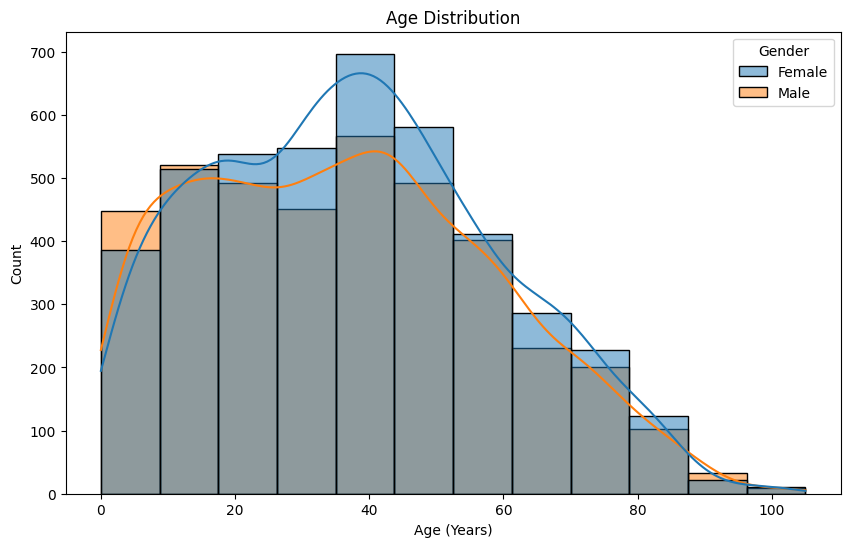

In [125]:
# Creating a histogram plot
plt.figure(figsize=(10,6))
plt.savefig("age_histplot.png")
plt.grid(False)
sns.histplot(x = clean_df["Age"], data = clean_df, bins = 12, hue = "Gender", kde = True); # Kernel density is enabled

# Setting plot title and axis labels
plt.title("Age Distribution")
plt.xlabel("Age (Years)")

# Displaying the plot
plt.show()

- Based on the histogram plot displayed above, it is evident that the male population, female population, and the overall population have experienced a decline in the recent years. In the next step, we will investigate this further by plotting the Age pyramid in order to have a clearer picture of the Age distribution within the population.

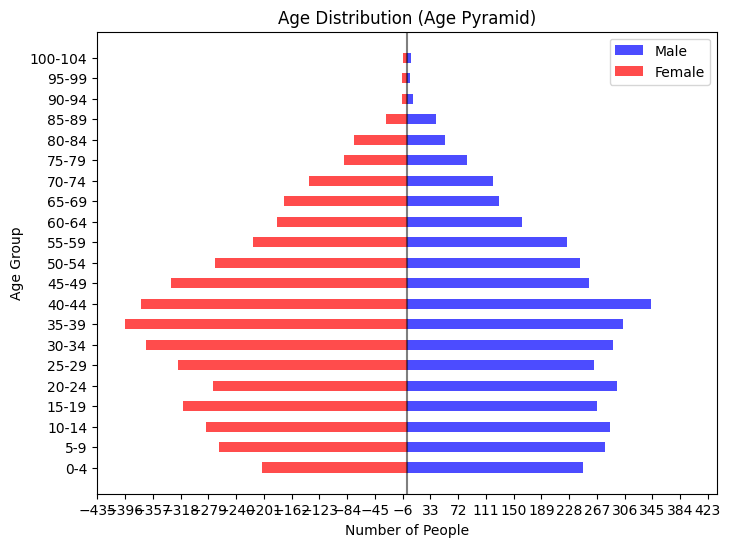

In [126]:
# Calculating the min and max age values
min_age = int(clean_df['Age'].min())
max_age = int(clean_df['Age'].max() + 0.1)

# Setting the bin size and creating the bins
bin_size = 5
bins = range(min_age, max_age + bin_size, bin_size)

# creating the age groups
clean_df['age_group'] = pd.cut(clean_df['Age'], bins=bins, labels=[f'{i}-{i+bin_size-1}' for i in bins[:-1]])

# grouping by age group and gender and calculating the total count
age_groups = clean_df.groupby(['age_group', 'Gender']).size().unstack()

# Separating male and female dataframes
males = age_groups['Male'].sort_index(ascending=True)
females = age_groups['Female'].sort_index()

# Plotting the age pyramid
fig, ax = plt.subplots(figsize=(8, 6))
plt.savefig("age_pyramid.png")

# Plotting the male and female bars separately
ax.barh(males.index, males, height=-0.5, align='center', color='blue', alpha=0.7, left=0, label='Male')
ax.barh(females.index, -females, height=0.5, align='center', color='red', alpha=0.7, label='Female')

# Setting the x-axis limits and ticks
max_count = max(abs(males).max(), abs(females).max())
ax.set_xlim([-max_count * 1.1, max_count * 1.1])
ax.set_xticks(range(-int(max_count * 1.1), int(max_count * 1.1) + 1, int(max_count * 0.1)))

# Adding the vertical line at x=0
ax.axvline(x=0, linestyle='-', color='black', alpha=0.5)

# Adding the labels and title
ax.set_xlabel('Number of People')
ax.set_ylabel('Age Group')
ax.set_title('Age Distribution (Age Pyramid)')

# Add the legend
ax.legend(loc='upper right')

# Displaying the plot
plt.show()

Observing the age pyramid plot above, it is notable that the widest base of the pyramid lies within the age ranges of 35-39 and 40-44. However, the base has reduced from the age range of 30-34 to 0-4, implying that birth rates have declined in recent years.

The fact that the base of the pyramid has narrowed from age range 30-34 and below indicates that there are fewer younger individuals in the population than there were in the past. This could be due to a variety of factors, such as changes in fertility rates, increased access to contraception, or changes in societal norms around family planning.

The fact that the widest base of the pyramid is in the age range of 35-39 and 40-44 suggests that the population is aging, as these individuals are moving up the pyramid and entering older age groups. This could have implications for issues such as healthcare, retirement, and social security, as there may be a larger number of older individuals in the population who require these services.

In addition, the fact that the base has reduced to the 0-4 age range suggests that there may be a smaller cohort of children in the population. This could have implications for issues such as education and childcare, as there may be a smaller pool of young individuals to support these systems.

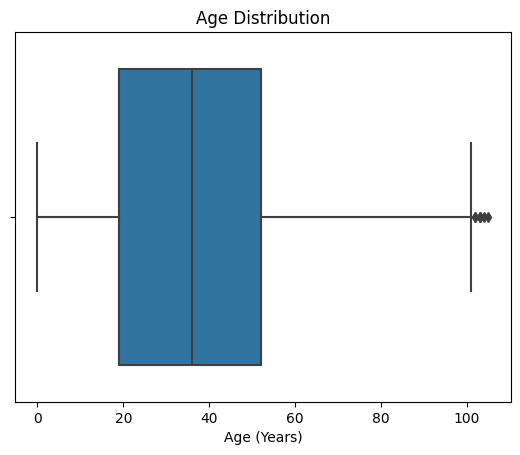

In [127]:
# Creating a boxplot for Age
sns.boxplot(x = clean_df["Age"], data = clean_df);
plt.savefig("age_boxplot.png")

# Setting plot title and axis labels
plt.title("Age Distribution")
plt.xlabel("Age (Years)")

# Displaying the plot
plt.show()

- The plot indicates the presence of outliers in the Age feature, but it is not necessarily unexpected for individuals to live up to 105 years. Additionally, the median age being close to the midpoint between Q1 and Q3 suggests that the distribution of ages is approximately symmetrical. This implies that the median age is roughly equal to the mean age of the dataset. An approximately symmetrical distribution is advantageous as it enables us to make certain assumptions about the data and utilize statistical tests that depend on these assumptions.

### Visualising Marital Status Feature

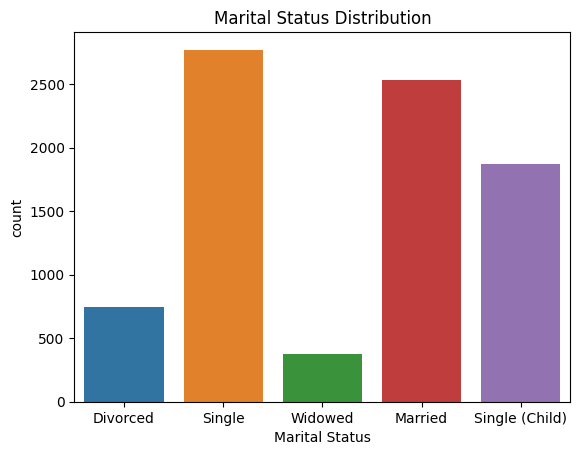

In [128]:
# Creating a plot
sns.countplot(x = clean_df["Marital_Status"], data = clean_df);
plt.savefig("Marital_countplot.png")

# Setting plot title and labels
plt.title('Marital Status Distribution');
plt.xlabel("Marital Status")

# Displaying the plot
plt.show()

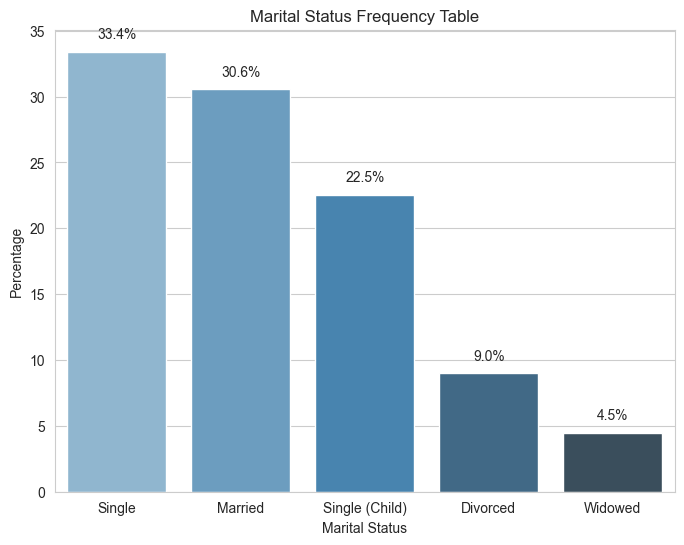

In [129]:
# Calculate count and percentage of each marital status
count = clean_df['Marital_Status'].value_counts()
percent = count / len(clean_df) * 100

# Create a table-like plot of marital status counts and percentages
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
plt.savefig("Marital_Freqplot.png")
ax = sns.barplot(x=count.index, y=percent, palette="Blues_d")
ax.set(xlabel='Marital Status', ylabel='Percentage', title='Marital Status Frequency Table')

# Add percentage labels above each bar
for i, v in enumerate(percent):
    ax.text(i,  v+1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

### Visualising Gender Feature

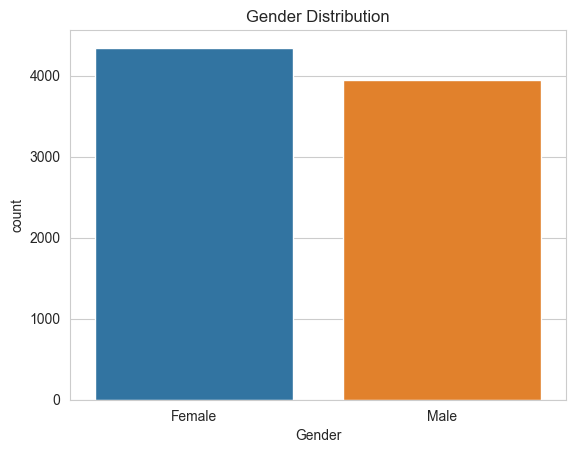

In [130]:
# Creating a plot
sns.countplot(x = clean_df["Gender"], data = clean_df);
plt.savefig("gender_countplot.png")

# Setting plot title and labels
plt.title('Gender Distribution');
plt.xlabel("Gender")

# Displaying the plot
plt.show();

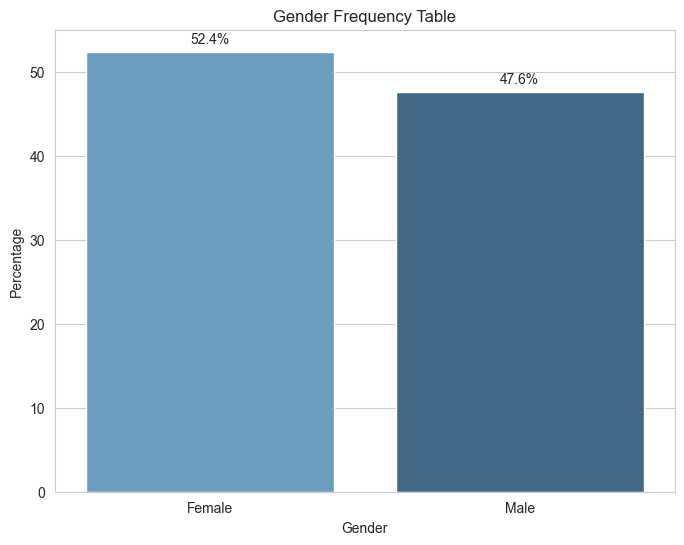

In [131]:
# Calculate count and percentage of each marital status
count = df['Gender'].value_counts()
percent = count / len(df) * 100

# Create a table-like plot of marital status counts and percentages
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
plt.savefig("gender_freqplot.png")
ax = sns.barplot(x=count.index, y=percent, palette="Blues_d")
ax.set(xlabel='Gender', ylabel='Percentage', title='Gender Frequency Table')

# Add percentage labels above each bar
for i, v in enumerate(percent):
    ax.text(i,  v+1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

### Visualising Infirmity Feature

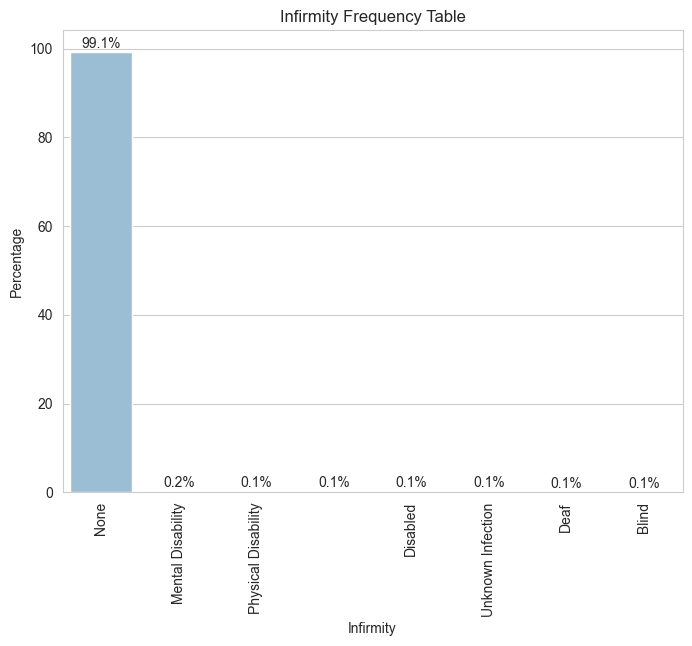

In [132]:
# Calculate count and percentage of each marital status
count = clean_df['Infirmity'].value_counts()
percent = count / len(clean_df) * 100

# Create a table-like plot of marital status counts and percentages
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
plt.savefig("infirmity_freqplot.png")
ax = sns.barplot(x=count.index, y=percent, palette="Blues_d")
ax.set(xlabel='Infirmity', ylabel='Percentage', title='Infirmity Frequency Table')

# Add percentage labels above each bar
for i, v in enumerate(percent):
    ax.text(i,  v+1, f"{v:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=90)
plt.show()

### Visualising Relationship to Head of House Feature

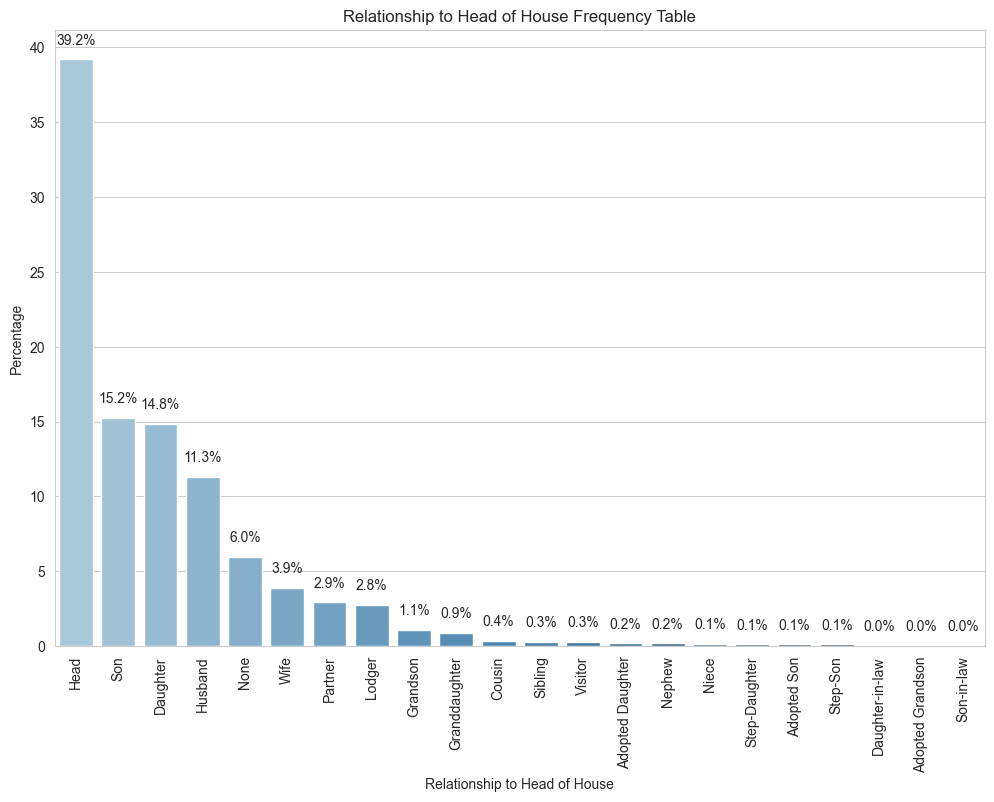

In [133]:
# Calculate count and percentage of each marital status
count = clean_df['Relationship_to_Head_of_House'].value_counts()
percent = count / len(clean_df) * 100

# Create a table-like plot of marital status counts and percentages
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.savefig("rel_freqplot.png")
ax = sns.barplot(x=count.index, y=percent, palette="Blues_d")
ax.set(xlabel='Relationship to Head of House', ylabel='Percentage', title='Relationship to Head of House Frequency Table')

# Add percentage labels above each bar
for i, v in enumerate(percent):
    ax.text(i,  v+1, f"{v:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=90)
plt.show()

### Visualising Occupation Feature

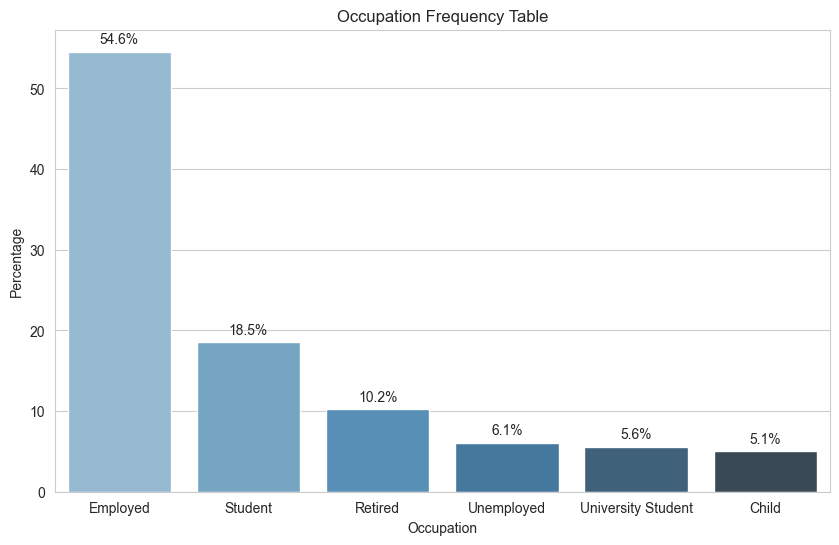

In [134]:
# Calculate count and percentage of each marital status
count = clean_df['Occupation'].value_counts()
percent = count / len(clean_df) * 100

# Create a table-like plot of marital status counts and percentages
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
plt.savefig("occupation_freqplot.png")
ax = sns.barplot(x=count.index, y=percent, palette="Blues_d")
ax.set(xlabel='Occupation', ylabel='Percentage', title='Occupation Frequency Table')

# Add percentage labels above each bar
for i, v in enumerate(percent):
    ax.text(i,  v+1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

### Visualising Religion Feature

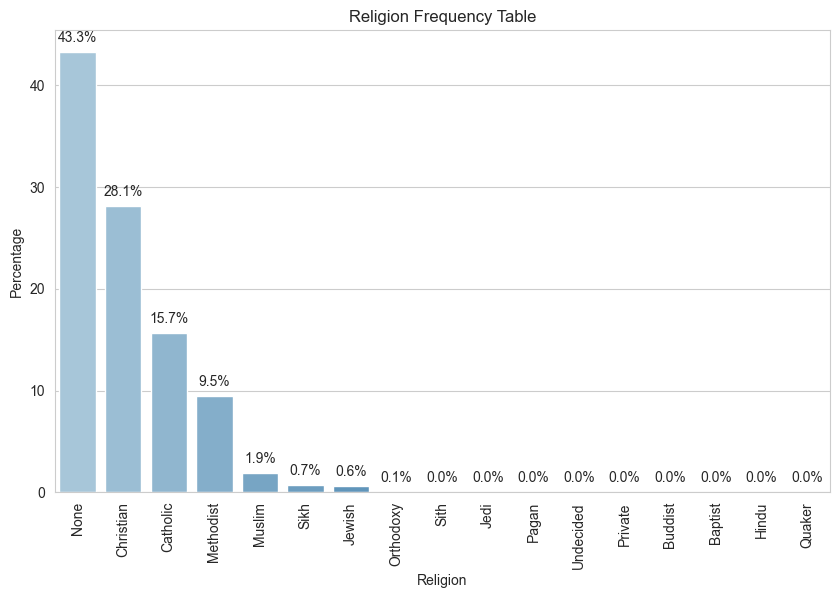

In [135]:
# Calculating count and percentage of each marital status
count = clean_df['Religion'].value_counts()
percent = count / len(clean_df) * 100

# Creating a table-like plot of marital status counts and percentages
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
plt.savefig("religion_freqplot.png")
ax = sns.barplot(x=count.index, y=percent, palette="Blues_d")
ax.set(xlabel='Religion', ylabel='Percentage', title='Religion Frequency Table')

# Adding percentage labels above each bar
for i, v in enumerate(percent):
    ax.text(i,  v+1, f"{v:.1f}%", ha='center', fontsize=10)

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Visualising Marital Status by Gender

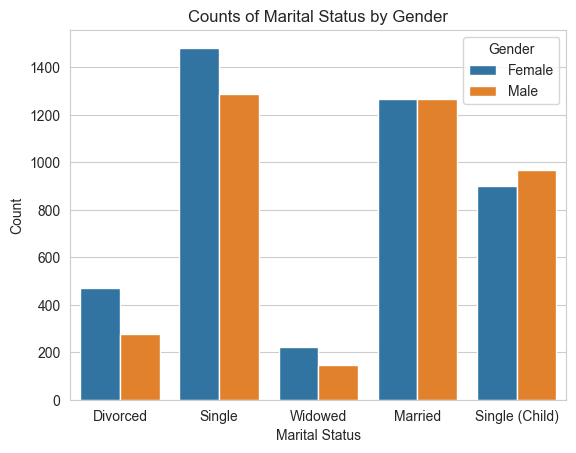

In [136]:
# Create a bar chart of counts for Marital Status by Gender
sns.set_style("whitegrid")
sns.countplot(x=clean_df["Marital_Status"], hue="Gender", data=clean_df)
plt.savefig("marital_genderfreqplot.png")

# Set axis labels and plot title
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Counts of Marital Status by Gender")

# Display the plot
plt.show()

### Visualising Religion by Marital Status

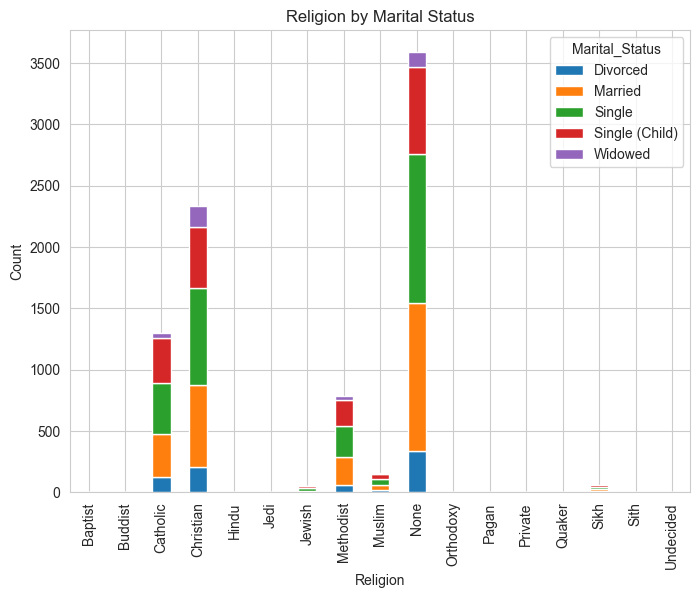

In [140]:
# Create a crosstab of Religion by Marital Status
religion_marital_ct = pd.crosstab(clean_df['Religion'], clean_df['Marital_Status'])

# Create stacked bar chart
sns.set_style("whitegrid")
ax = religion_marital_ct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.savefig("religion_maritalfreqplot.png")
ax.set_ylabel('Count')
ax.set_title('Religion by Marital Status')
plt.show()

### Visualising Age Distribution by Relationship to Head of House

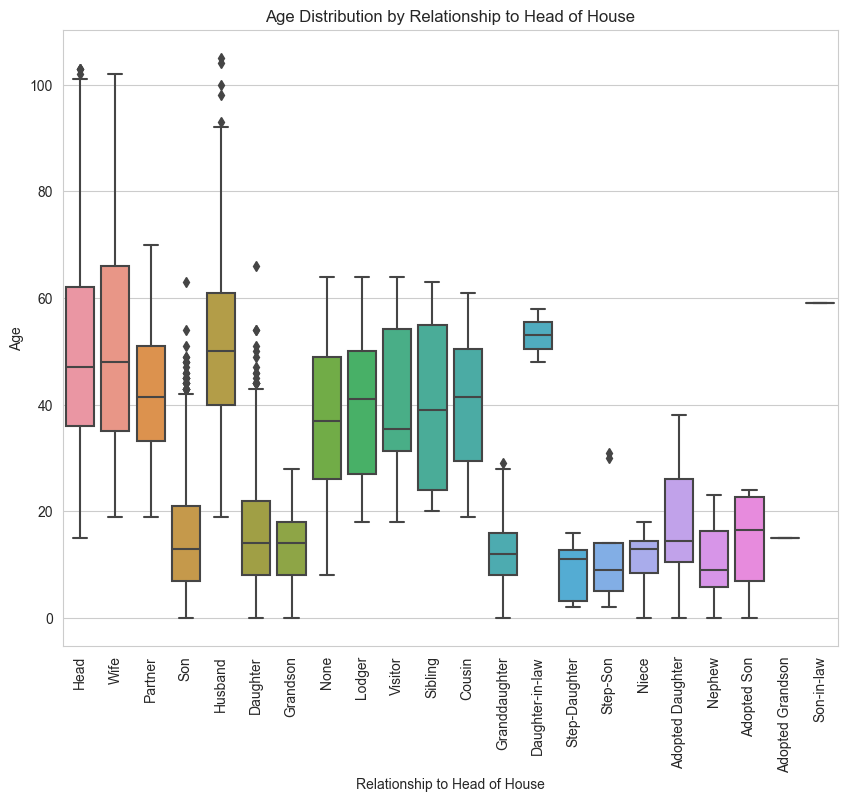

In [141]:
# Create a box plot of Age by Relationship to Head of House
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(x="Relationship_to_Head_of_House", y="Age", data=df)
plt.savefig("age_relfreqplot.png")

# Set axis labels and plot title
plt.xlabel("Relationship to Head of House")
plt.ylabel("Age")
plt.title("Age Distribution by Relationship to Head of House")
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The boxplot above reveals some outliers in the Son and Daughter category of the Relationship to Head of House. Notably, some individuals above the age of 40 identified themselves as Sons and Daughters to their respective Heads of Houses, which is not a realistic scenario. However, the presence of outliers in the Head and Husband categories may not be inappropriate, as there could be a Head or Husband who is above 100 years old. However, it seems unlikely for a 30+ year-old Step-Son or a 30-year-old Granddaughter to be living with their grandparents.

### Visualising Age Distribution by Occupation

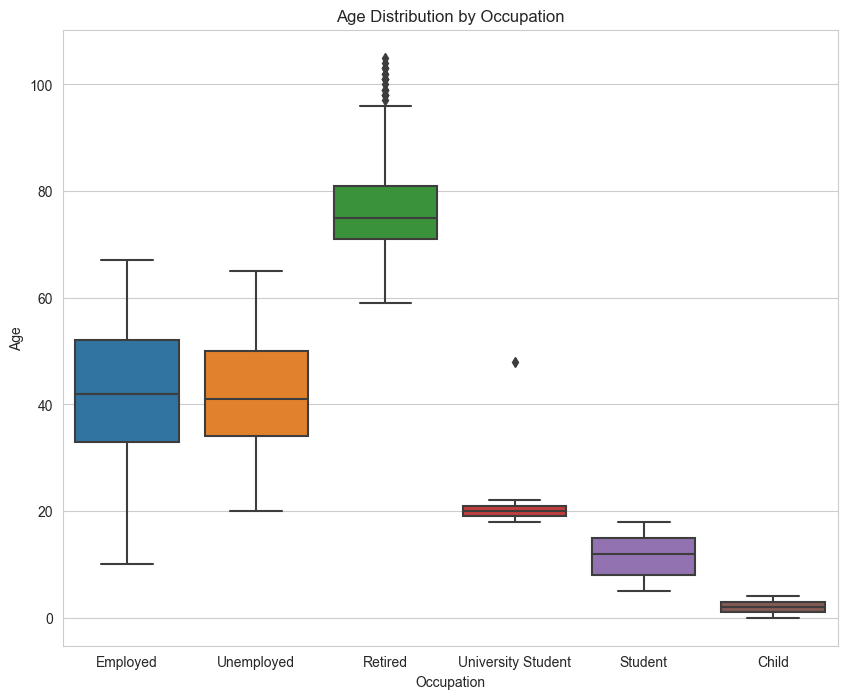

In [142]:
# Create a box plot of Age by Occupation
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(x="Occupation", y="Age", data=df)
plt.savefig("age_occupationfreqplot.png")

# Set axis labels and plot title
plt.xlabel("Occupation")
plt.ylabel("Age")
plt.title("Age Distribution by Occupation")

# Display the plot
plt.show()

- Based on the boxplot above, we can observe outliers in the Retired category due to the presence of individuals who are above 100 years old. While this is not common, it is not necessarily inappropriate for someone in this category to live past 100 years. Similarly, it is not uncommon for university students to be around 50 years old, although this is not the norm. Additionally, there are individuals above 65 years of age who are employed, and this is not necessarily inappropriate as they may be engaged in contract jobs after their official retirement age.

### Visualising Age Distribution by Religion

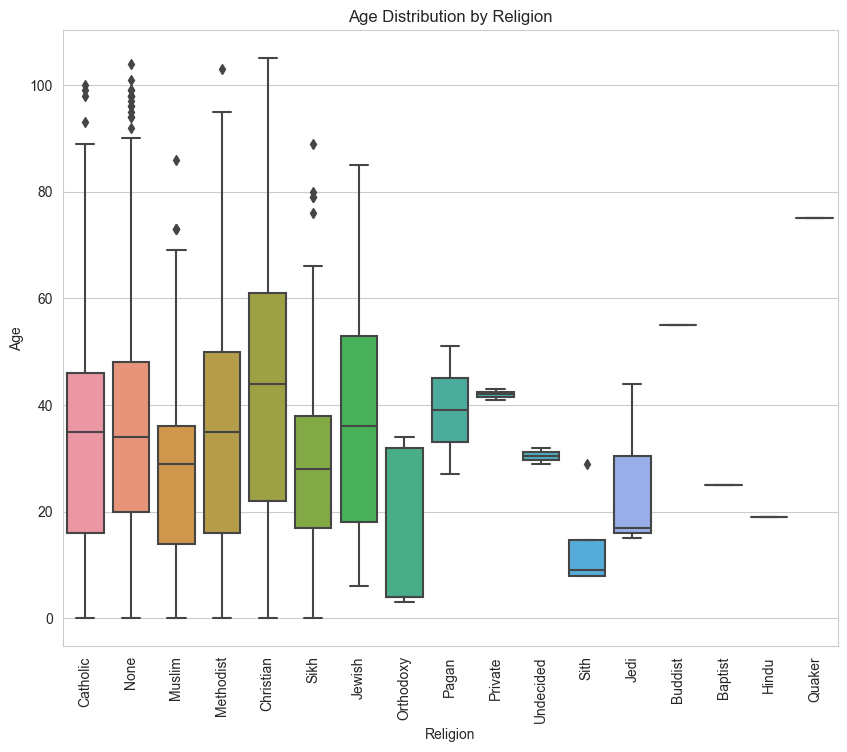

In [143]:
# Create a box plot of Age by Occupation
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(x="Religion", y="Age", data=df)
plt.savefig("age_religionfreqplot.png")

# Set axis labels and plot title
plt.xlabel("Religion")
plt.ylabel("Age")
plt.title("Age Distribution by Religion")
plt.xticks(rotation=90)

# Display the plot
plt.show()

- The plot above reveals that the Catholic Religion is predominantly practiced by younger individuals, while the Sith Religion is mostly practiced by children. However, the fact that almost everyone who practices Sith Religion is a child seems unlikely. Overall, the plot suggests that religion is more common among young people in the population.

## Data Analysis

In [144]:
# Displaying the first 5 rows of the updated dataframe
clean_df.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,age_group
0,1,Davies Trafficway,Paula,Houghton,42,Head,Divorced,Female,Employed,None,Catholic,40-44
1,2,Davies Trafficway,Ashleigh,Smith,42,Head,Single,Female,Unemployed,None,None,40-44
2,3,Davies Trafficway,Douglas,Gibson,74,Head,Widowed,Male,Retired,None,Catholic,70-74
3,4,Davies Trafficway,Carly,Johnson,26,Head,Single,Female,Unemployed,None,None,25-29
4,5,Davies Trafficway,Lauren,Jenkins,32,Head,Divorced,Female,Employed,None,Muslim,30-34


### Birth Rate & Death Rate

Steps
1. The total population is calculated by finding the length of the "clean_df" dataset.
2. Two lists are defined, "age_range" and "age_range2", which contain the different age groups for which birth rates and death rates will be calculated.
3. A for loop is used to iterate over the "age_range" list, and for each age group, the number of births is calculated by finding the length of the "clean_df" dataset where the "age_group" column equals the current age group.
4. The birth rate is calculated by dividing the total number of births for the age group by the total population, and multiplying the result by 1000. The birth rate is then printed to the console using string formatting.
5. Another for loop is used to iterate over the "age_range2" list, and for each age group, the number of deaths is calculated by finding the length of the "clean_df" dataset where the "age_group" column equals the current age group.
6. The death rate is calculated by dividing the total number of deaths for the age group by the total population, and multiplying the result by 1000. The death rate is then printed to the console using string formatting.
7. A separator is printed to the console to separate the birth and death rates.

In [145]:
# calculating birth rate
total_population = len(clean_df)

age_range = ["35-39", "30-34", "25-29", "20-24", "15-19", "10-14", "5-9", "0-4"]
for age in age_range:
    total_births = len(clean_df[clean_df["age_group"] == age])
    birth_rate = (total_births / total_population) * 1000
    print(f"Birth rate for Age Group {age} : {birth_rate:.2f} per 1000 people")

print("--------------------------------------------------------")

# calculating death rate
age_range = ["100-104", "95-99", "90-94", "85-89", "80-84", "75-79", "70-74", "65-69"]
for age in age_range:
    total_deaths = len(clean_df[clean_df["age_group"] == age])
    death_rate = (total_deaths / total_population) * 1000
    print(f"Death rate for Age Group {age} : {death_rate:.2f} per 1000 people")

Birth rate for Age Group 35-39 : 84.26 per 1000 people
Birth rate for Age Group 30-34 : 79.07 per 1000 people
Birth rate for Age Group 25-29 : 70.40 per 1000 people
Birth rate for Age Group 20-24 : 68.47 per 1000 people
Birth rate for Age Group 15-19 : 70.03 per 1000 people
Birth rate for Age Group 10-14 : 68.35 per 1000 people
Birth rate for Age Group 5-9 : 65.45 per 1000 people
Birth rate for Age Group 0-4 : 54.36 per 1000 people
--------------------------------------------------------
Death rate for Age Group 100-104 : 1.33 per 1000 people
Death rate for Age Group 95-99 : 1.45 per 1000 people
Death rate for Age Group 90-94 : 1.81 per 1000 people
Death rate for Age Group 85-89 : 8.44 per 1000 people
Death rate for Age Group 80-84 : 15.43 per 1000 people
Death rate for Age Group 75-79 : 20.97 per 1000 people
Death rate for Age Group 70-74 : 31.10 per 1000 people
Death rate for Age Group 65-69 : 36.40 per 1000 people


- Based on the estimated birth rate calculated, it is evident that there has been a decline in birth rate, leading to a decrease in population growth. Additionally, the estimated death rate indicates an increase in mortality.

- When the birth rate is declining while the death rate is increasing, it generally indicates that the population is aging and that there are fewer births occurring. This demographic trend can have several implications, such as a smaller workforce to support an aging population, potential strain on social security and healthcare systems, and decreased economic growth. Additionally, this trend could lead to a decrease in overall population size if the death rate surpasses the birth rate, which could have further social and economic implications.

### Migration Rate

This will be calculated based on an assumption that the visitors and lodgers are migrants. The percentage of these migrants will be calculated across 2 age groups that are known for migration.

The age group that migrates more can vary depending on several factors such as economic opportunities, political stability, family reunification, and educational opportunities in different regions or countries. However, in many cases, young adults in their late teens to early 30s tend to migrate more frequently than other age groups. This age group is often more mobile and may be seeking better job opportunities, education, or new experiences. Additionally, this age range is often less likely to have established families and may be more flexible in terms of relocating. However, it's important to note that migration patterns can vary widely based on individual circumstances and the specific conditions in the regions or countries involved.


This code creates two dataframes for the two time points. It then calculates the population at each time point for each age group and the total population at each time point. The number of migrants is calculated by counting the number of visitors and lodgers at each time point and taking the difference. Finally, the migration rate is calculated as a percentage of the average population.

In [146]:
age_group1 = clean_df[clean_df["age_group"] == "15-19"]
migrants1 = age_group1[(age_group1['Relationship_to_Head_of_House'] == 'Visitor') | (age_group1['Relationship_to_Head_of_House'] == 'Lodger')]
migrant_count1 = len(migrants1)

age_group2 = clean_df[clean_df["age_group"] == "20-24"]
migrants2 = age_group2[(age_group2['Relationship_to_Head_of_House'] == 'Visitor') | (age_group2['Relationship_to_Head_of_House'] == 'Lodger')]
migrant_count2 = len(migrants2)

total_population1 = len(age_group1)
total_population2 = len(age_group2)


total_migrants =  migrant_count2 - migrant_count1

# Calculating migration rate
migration_rate = (total_migrants / ((total_population1 + total_population2) / 2)) * 100

print('Migration rate:', migration_rate, '%')

Migration rate: 2.4369016536118364 %


### Commuter's Rate

It's difficult to say for sure whether visitors and lodgers are likely to commute without more information about their specific circumstances. Visitors and lodgers may be staying in the town for a short period of time and may not have a need to commute regularly. However, they could also be living in the town for an extended period of time and may have a need to commute for work or school.

Without more information, it's best to assume that visitors and lodgers are not part of the regular commuting population and exclude them from the calculation of the commuter rate.

Regarding the employed population, it's possible that some of them commute within the town, while others commute to the nearby cities for work. Without additional information, we cannot make an assumption about the percentage of employed people who commute within the town. However, if we could assume that most of the employed population commutes outside of the town for work for the sake of this analysis.

The code below filters out the rows where the "Relationship to the Head" is either "Lodger" or "Visitor", and then calculates the total number of people who are not lodgers or visitors, but includes University Students. Next, it filters the rows where the "Occupation" is "Employed" or "University Student" and the "Relationship to the Head" is not "Child", and calculates the number of employed people or University Students who are not children. Finally, it calculates the commuter's rate as the ratio of the potential commuters who are not children to the total number of people who are not lodgers or visitors, and prints the result.

In [147]:
# filter out the "lodgers" and "visitors"
clean_df = clean_df[(clean_df['Relationship_to_Head_of_House'] != 'Lodger') & (clean_df['Relationship_to_Head_of_House'] != 'Visitor')]

# calculate the total number of people who are not lodgers or visitors
total_people = len(clean_df)

# calculate the number of employed people who are not children, but include university students
potential_commuters = len(clean_df[(clean_df['Occupation'] == 'Employed') | (clean_df['Occupation'] == 'University Student') & (clean_df['Relationship_to_Head_of_House'] != 'Child')])

# calculate the commuter's rate
commuter_rate = potential_commuters / total_people

print("Commuter's rate: {:.2%}".format(commuter_rate))

Commuter's rate: 59.20%


- The implication of the above result is that a significant proportion of the population travels to work or school from their homes, and this could have several implications for the community. For example, it could mean that there is a high demand for transportation services, such as buses or trains, during peak hours. It could also indicate that there is a need for more infrastructure or housing near employment centers to reduce commuting times and costs. Additionally, a high commuter rate could impact the local economy, as commuters may spend less time and money in the local community compared to residents who work closer to home.

Regarding whether it's appropriate to invest in a train station, the fact that there are 464 University students who school in the city but live in the town suggests that there may be a significant demand for transportation between the town and the city. However, more information is needed to make a definitive decision. For example, it would be helpful to know the current transportation options available (e.g. bus routes, highways), the current traffic levels and congestion, and the cost and feasibility of building a train station. It may also be useful to conduct a survey of residents and commuters to gauge their interest in a train station and their willingness to use it. Ultimately, the decision of whether or not to invest in a train station should be based on a thorough analysis of the costs and benefits, taking into account both short-term and long-term factors.

With regards to whether it's appropriate to invest in a train station, considering that the town is between two cities and has a significant number of students and employed people, a train station may be a viable investment. However, a more detailed analysis would be necessary to evaluate the feasibility and potential benefits of such an investment.

### Divorce Rate

In [148]:
# Calculating the total number of individuals in the group
total_count = len(clean_df["Marital_Status"])

# Calculating the number of individuals who have been divorced
divorced_count = len(clean_df[clean_df['Marital_Status'] == 'Divorced'])

# Calculating the divorce rate as a percentage
divorced_rate = (divorced_count / total_count) * 100

# Calculate the divorce rate per thousand of the population
divorce_rate = (divorced_count / total_count) * 1000

# Printing the output
print('The divorce rate in percentage is {:.2f}%.'.format(divorced_rate))
print('The divorce rate per thousand of the population is {:.2f}.'.format(divorce_rate))

The divorce rate in percentage is 8.39%.
The divorce rate per thousand of the population is 83.93.


- The above result means that for every 1000 individuals in the population, there are approximately 83 individuals who are divorced. This is a measure of the prevalence of divorce in the population, expressed in terms of the number of divorces per 1000 individuals.

### Marriage Rate

In [149]:
# Calculating the total number of individuals in the group
total_count = len(clean_df["Marital_Status"])

# Calculating the number of individuals who are married
married_count = len(clean_df[clean_df['Marital_Status'] == 'Married'])

# Calculating the marriage rate as a percentage
married_rate = (married_count / total_count) * 100

# Calculating the marriage rate per thousand of the population
marriage_rate = (married_count / total_count) * 1000

# Printing the output
print('The marriage rate in percentage is {:.2f}%.'.format(married_rate))
print('The marriage rate per thousand of the population is {:.2f}.'.format(marriage_rate))

The marriage rate in percentage is 31.53%.
The marriage rate per thousand of the population is 315.34.


- The above result means that for every 1000 individuals in the population, there are approximately 315 individuals who are married. This is a measure of the prevalence of divorce in the population, expressed in terms of the number of divorces per 1000 individuals.

### Occupancy Rate

In [150]:
# define households using 'House Number' and 'Street' columns
households = clean_df.groupby(['House_Number', 'Street'])

# calculate the number of individuals in each household
household_sizes = households.size()

# calculate the total number of individuals in all households
total_individuals = household_sizes.sum()

# calculate the total number of households
total_households = household_sizes.count()

# calculate the average household size
average_household_size = total_individuals / total_households

# print the occupancy level
print(f"The occupancy level is {average_household_size:.2f} individuals per household.")

The occupancy level is 2.47 individuals per household.
